In [1]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
#import missingno as msno
import plotly.graph_objects as go
from ipysankeywidget import SankeyWidget

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:\\Users\\caste\\Desktop\\7506\\2021\\tp\data\\train_values.csv')
df_train_labels = pd.read_csv('C:\\Users\\caste\\Desktop\\7506\\2021\\tp\data\\train_labels.csv')

In [3]:
df_train = df_train.merge(df_train_labels, how='inner', on=['building_id', 'building_id'])

In [4]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


# Primeras aproximacion

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
df_index = df_train.index
df_columns = df_train.columns
df_data = df_train.values

### Tipos de datos

In [7]:
df_train.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [8]:
df_train.dtypes.value_counts()

int64     32
object     8
dtype: int64

In [9]:
df_train.size

10424040

In [10]:
df_train.shape

(260601, 40)

In [11]:
df_train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
def valoresNulos1(columna):
    
    #counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    #print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return columna.name,total,suma_null,porcentaje_nulos

### Valores nulos

In [13]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [14]:
dfNulos = pd.DataFrame(row,columns=["Columna", "Total", "Cantidad Nulos", "%Nulos"]) 
dfNulos

,Columna,Total,Cantidad Nulos,%Nulos
0,building_id,260601,0,0.0
1,geo_level_1_id,260601,0,0.0
2,geo_level_2_id,260601,0,0.0
3,geo_level_3_id,260601,0,0.0
4,count_floors_pre_eq,260601,0,0.0
5,age,260601,0,0.0
6,area_percentage,260601,0,0.0
7,height_percentage,260601,0,0.0
8,land_surface_condition,260601,0,0.0
9,foundation_type,260601,0,0.0


### Matriz de correlacion

In [15]:
# supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
#'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
#'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
#'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
#'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
#'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
#'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 
#'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
#'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
#'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
#'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 
#'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
#'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
#'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
#'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
#'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 
#'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
#'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [16]:
cor = df_train.drop('building_id', axis=1).corr().abs()

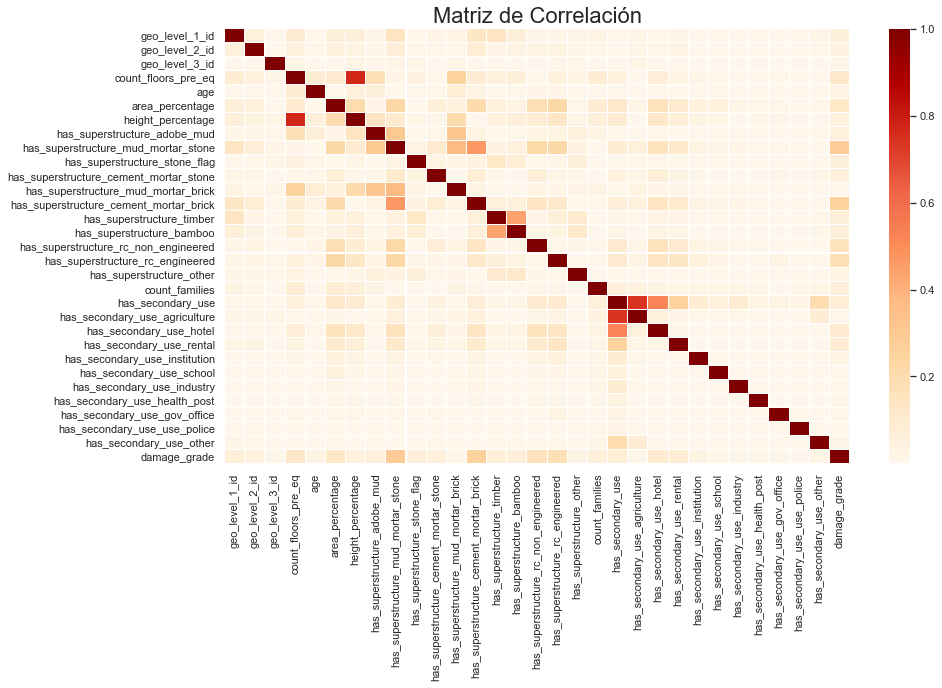

In [17]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(14,8))        

sns.heatmap(cor,annot=False,linewidth = 0.05, cmap='OrRd' );
plt.title('Matriz de Correlación', fontsize=22);

In [18]:
df_train.land_surface_condition.value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

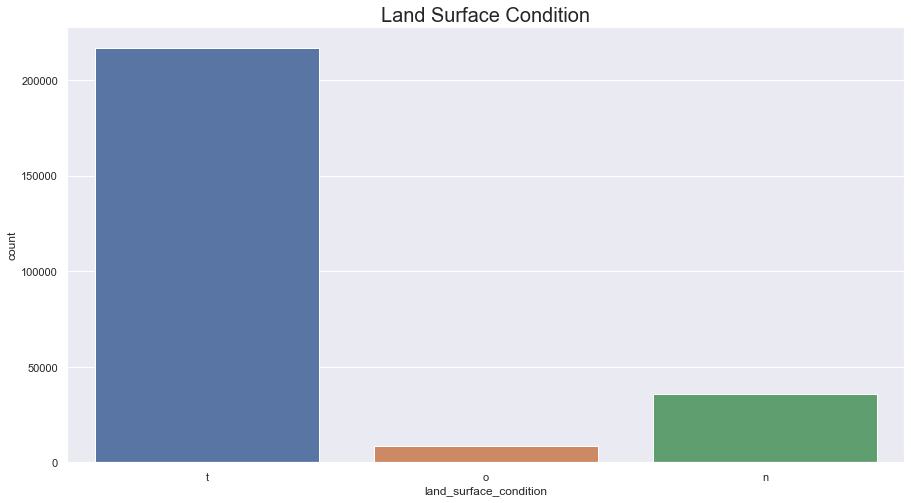

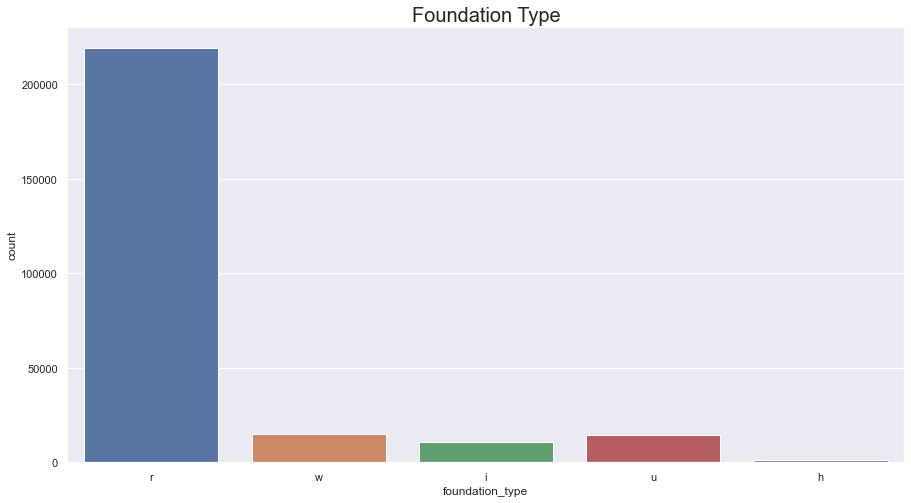

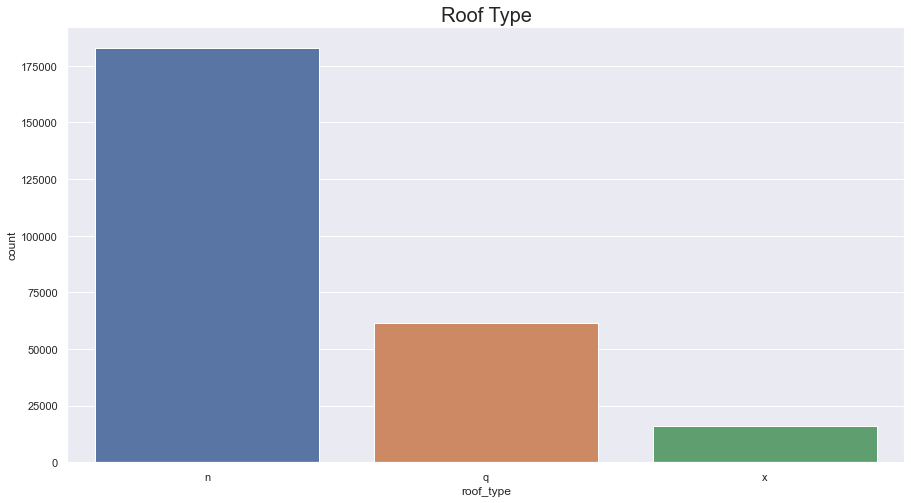

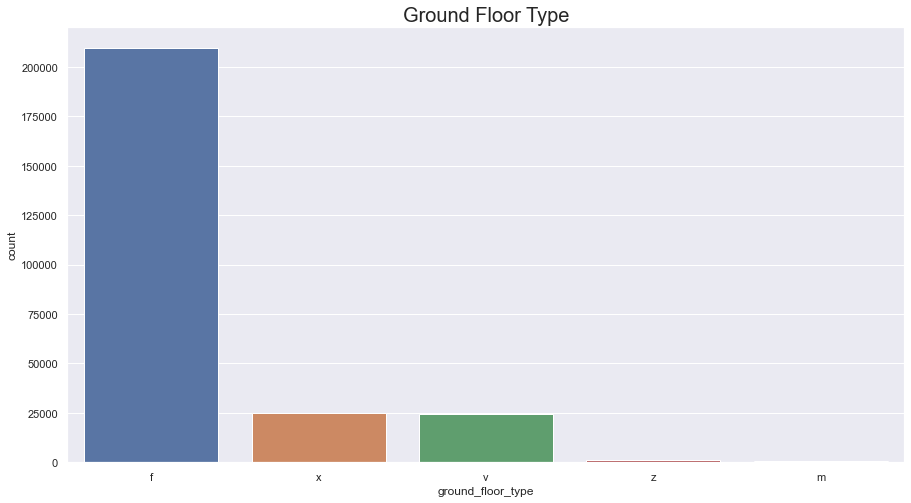

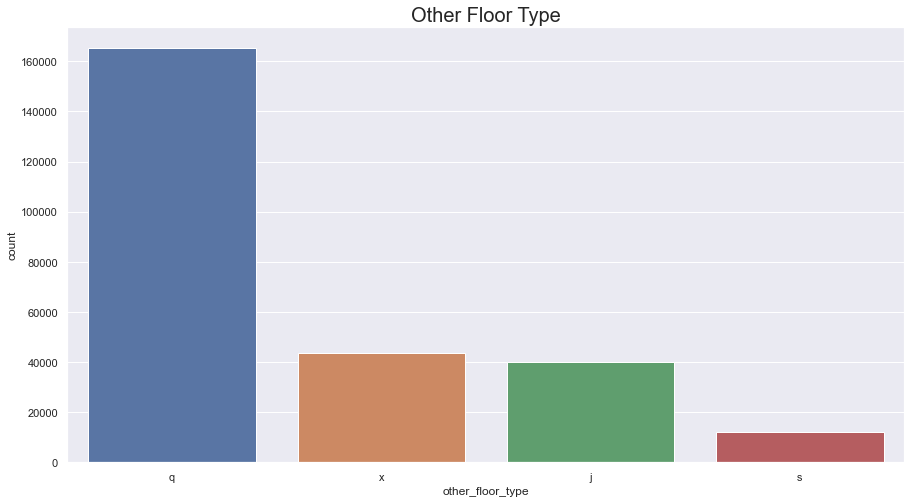

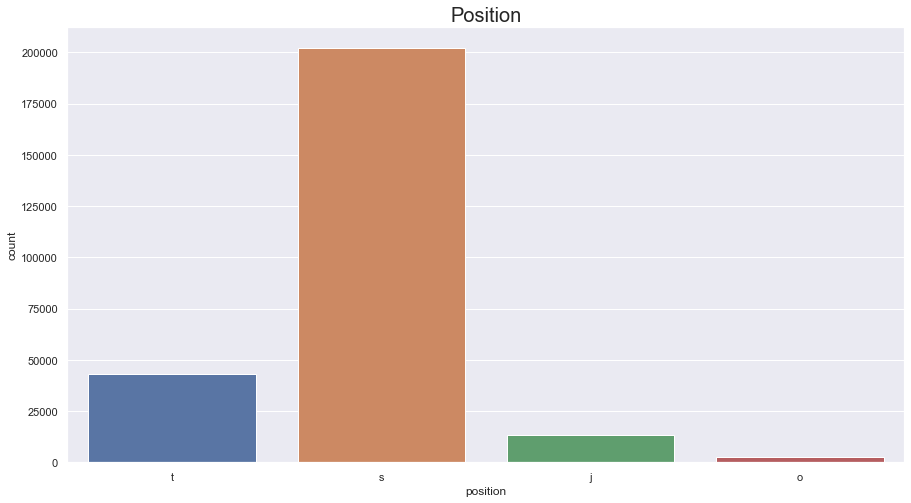

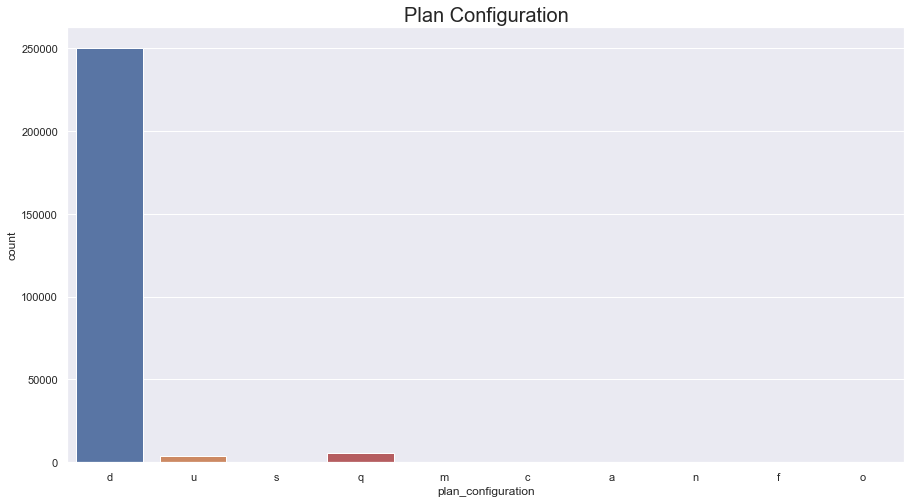

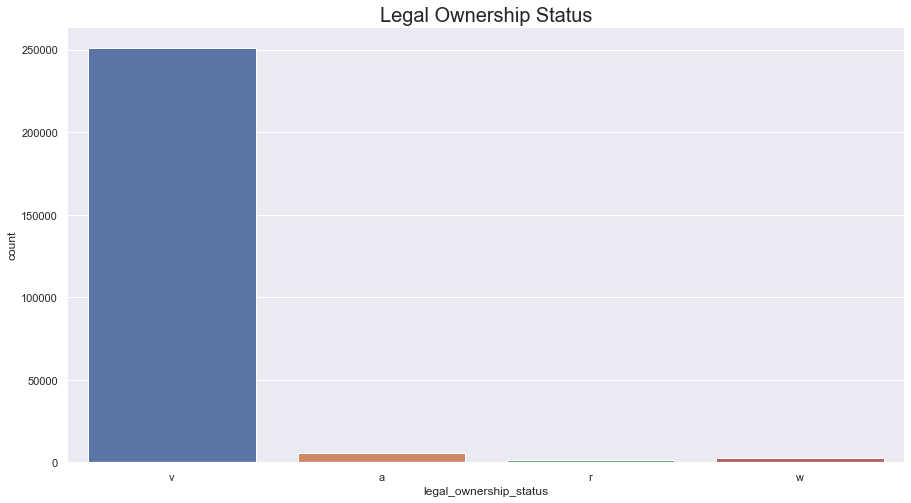

In [19]:
#columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
columns=df_train.select_dtypes(include='object').columns.to_list()
for col_name in columns:
        plt.figure(figsize=(15,8))
        sns.countplot(x=col_name, data=df_train)
        plt.title(col_name.replace("_"," ").title(), fontsize=20)
        plt.show()

Dado que las columnas tiene pocos valores podemos covertilas a categoricas.

In [20]:
#columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
columns=df_train.select_dtypes(include='object').columns.to_list()
for col_name in columns:
    df_train[col_name] = df_train[col_name].astype('category')


In [21]:
df_train.dtypes

building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud                 int64
has_superstructure_mud_mortar_stone          int64
has_superstructure_stone_flag                int64
has_superstructure_cement_mortar_stone       int64
has_superstructure_mud_mortar_b

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [23]:
#df_train_category = df_train.select_dtypes(include='category')
df_train.select_dtypes(include='number').iloc[:,4:]

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,2,30,6,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,10,8,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,2,10,5,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,2,10,6,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,3,30,8,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1,55,6,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
260597,2,0,6,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
260598,3,55,6,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
260599,2,10,14,6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [24]:
#sns.pairplot(df_train.select_dtypes(include='number').iloc[:,4:])


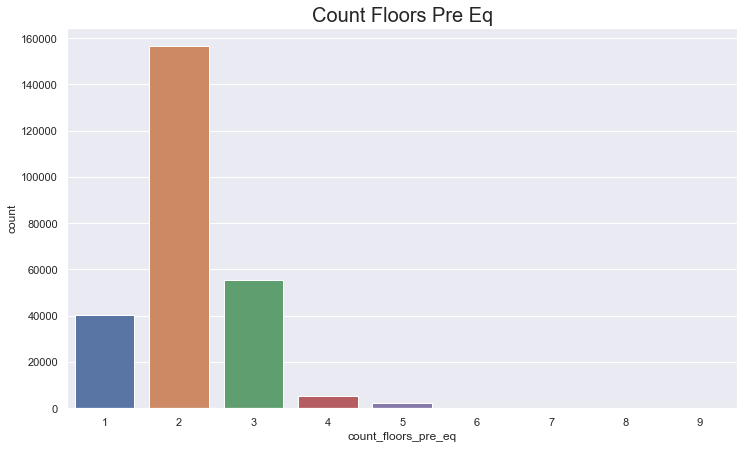

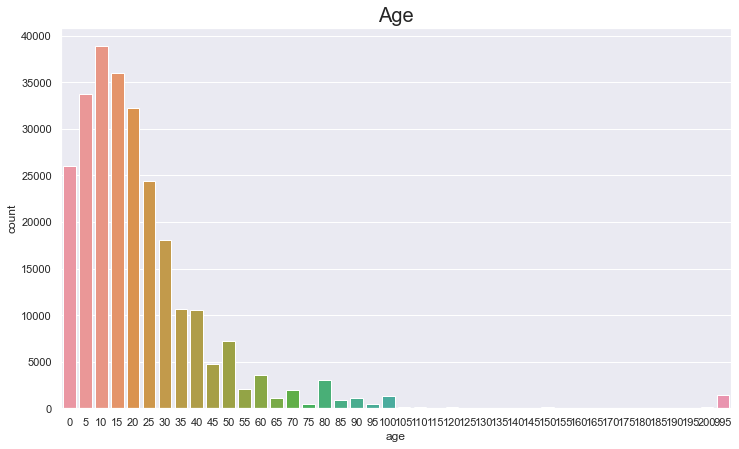

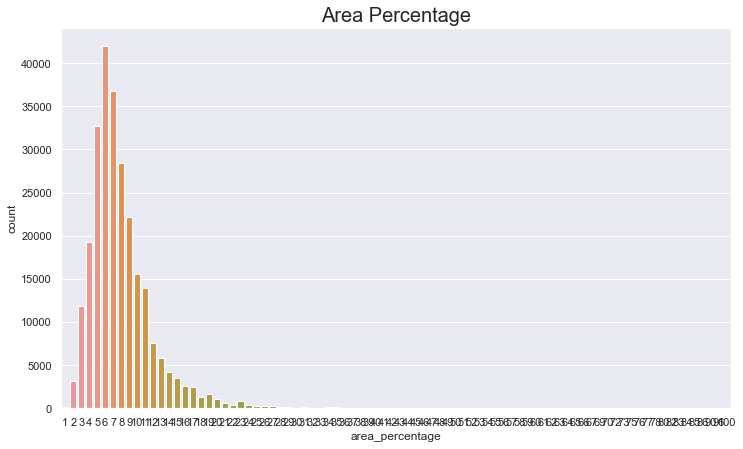

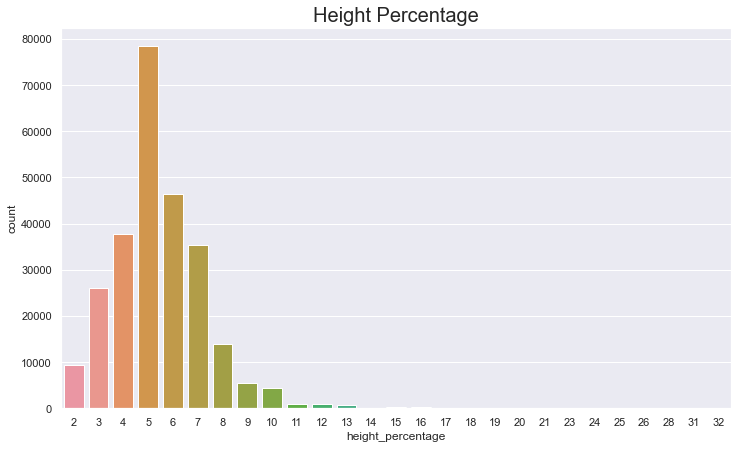

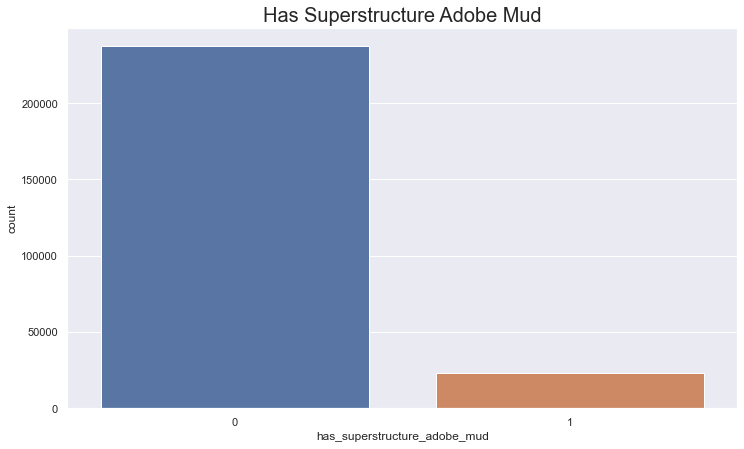

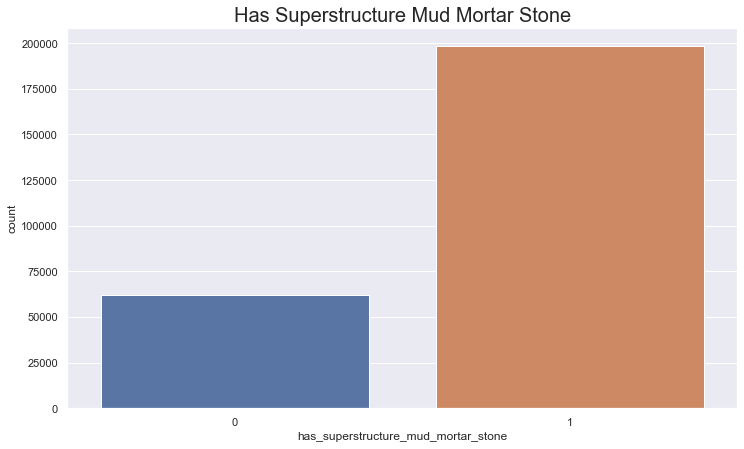

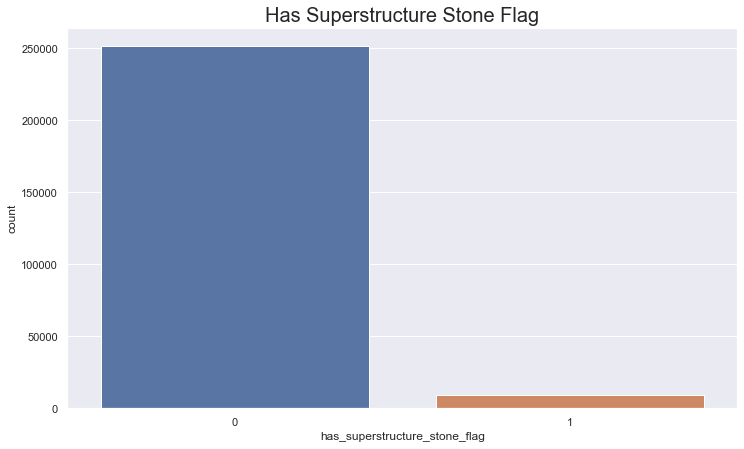

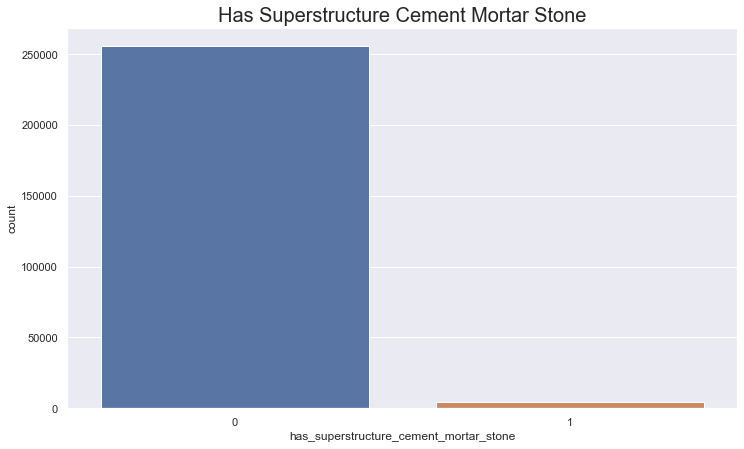

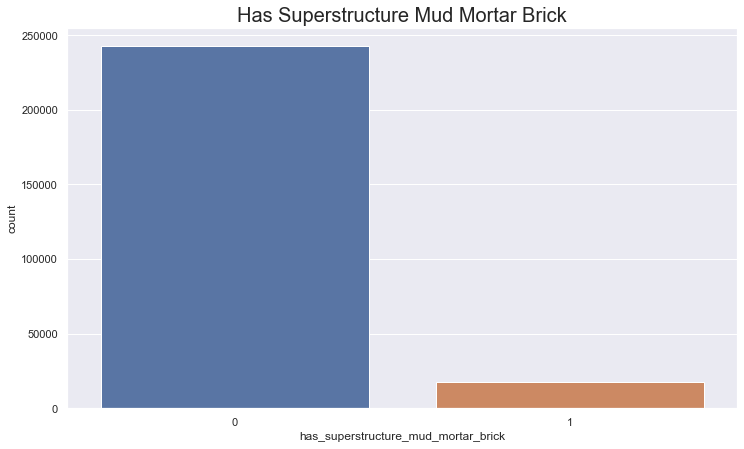

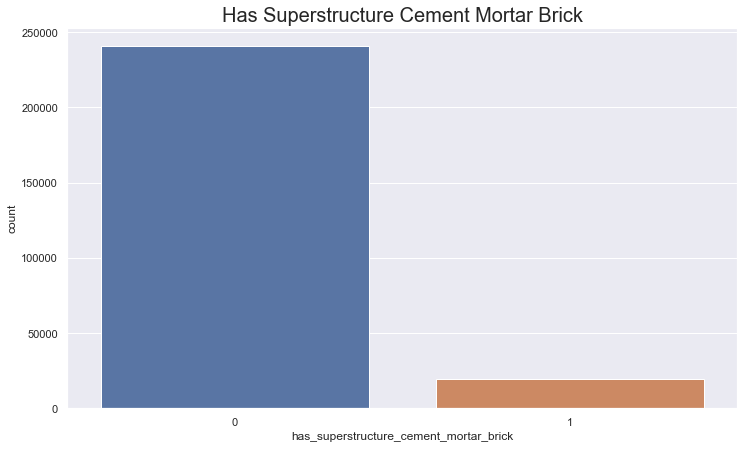

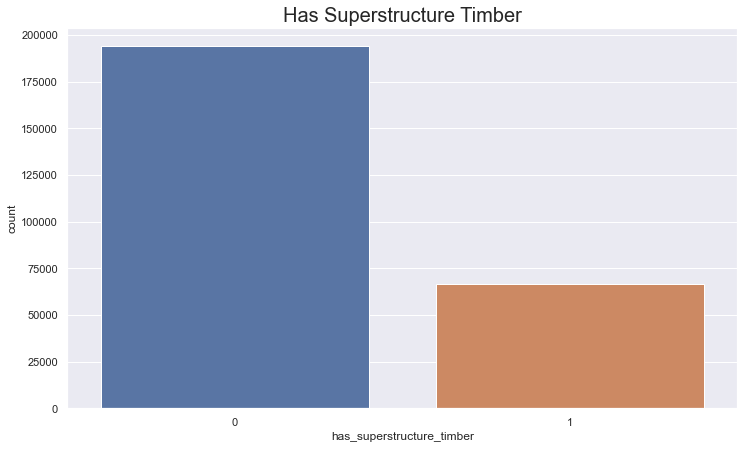

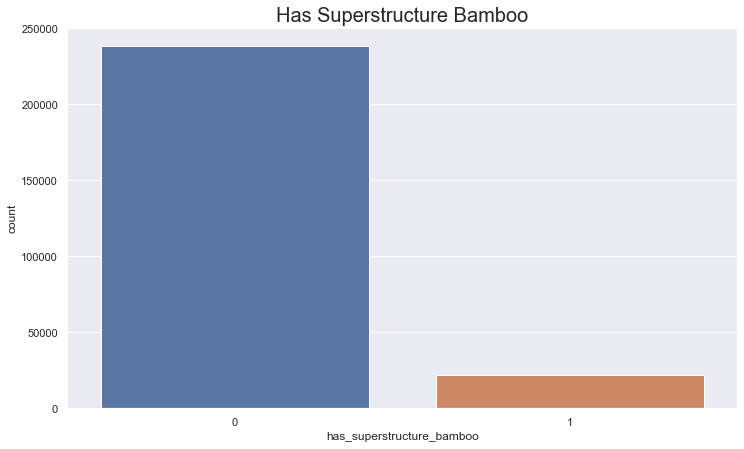

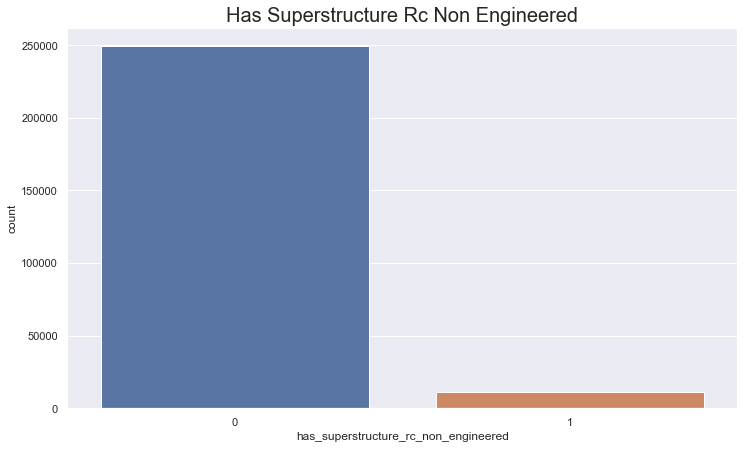

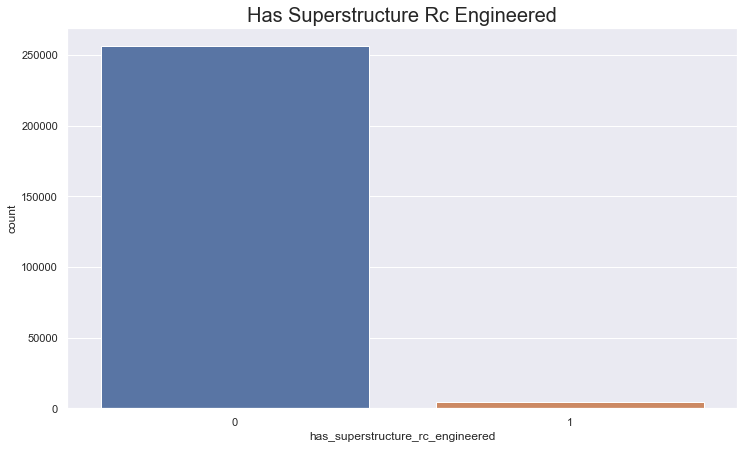

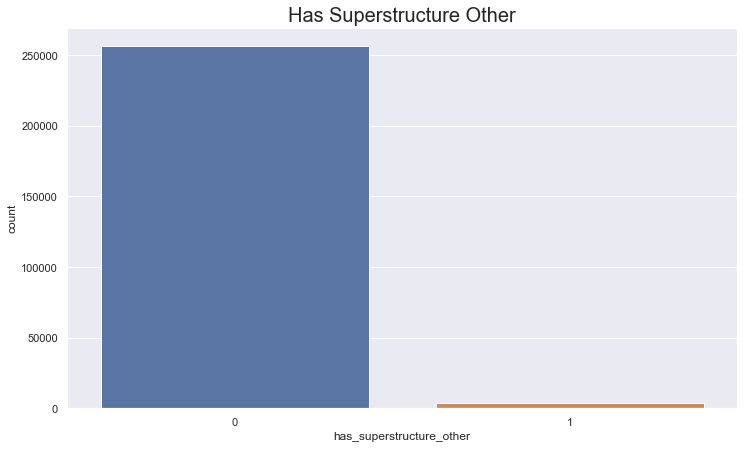

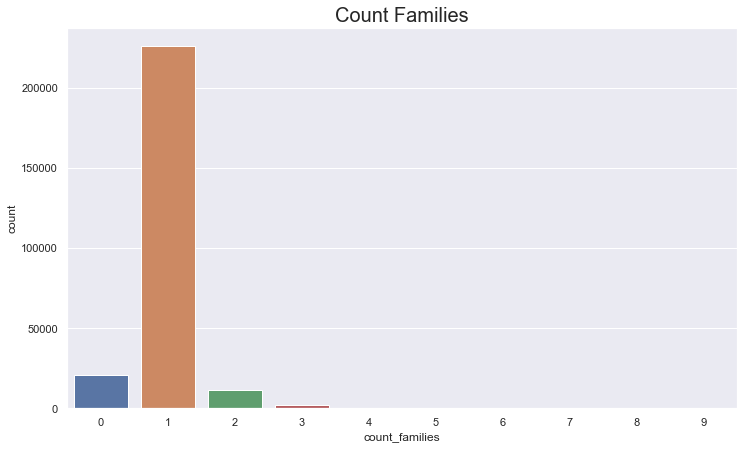

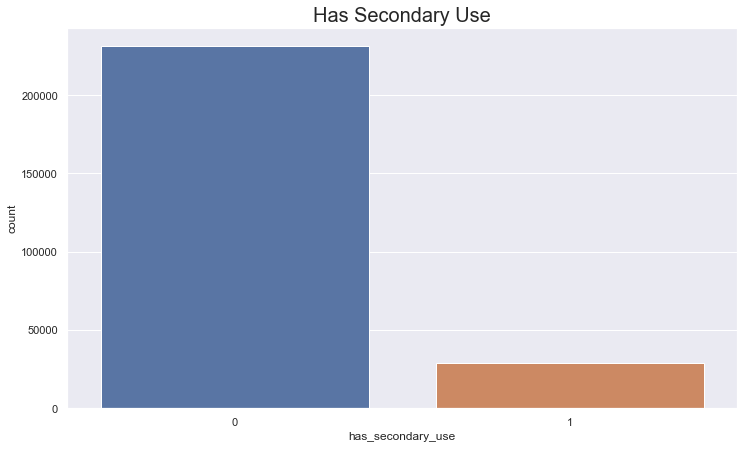

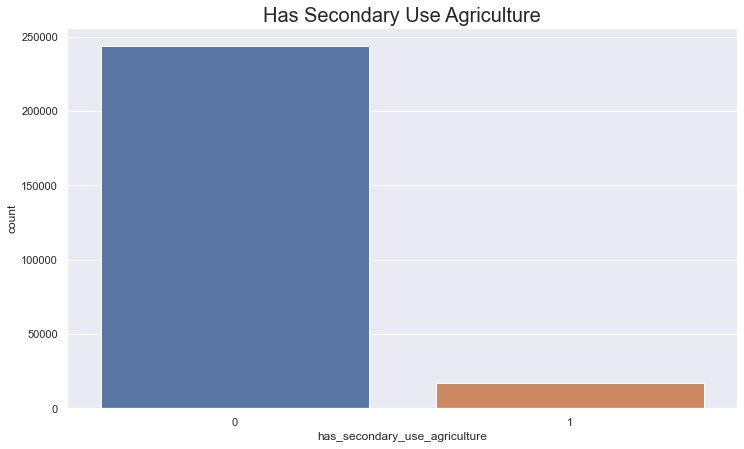

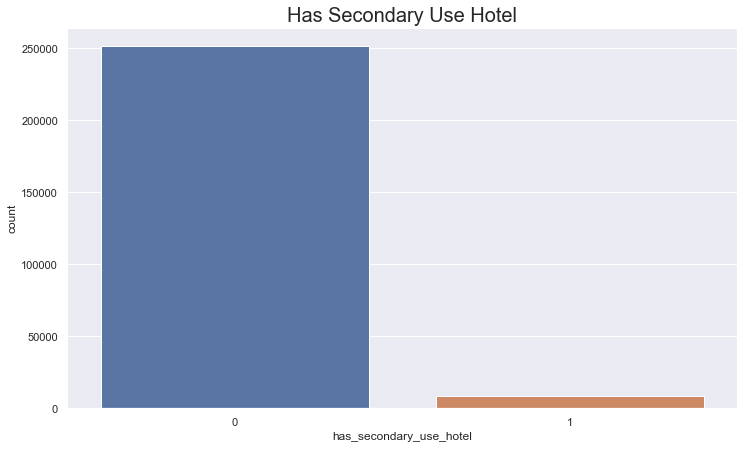

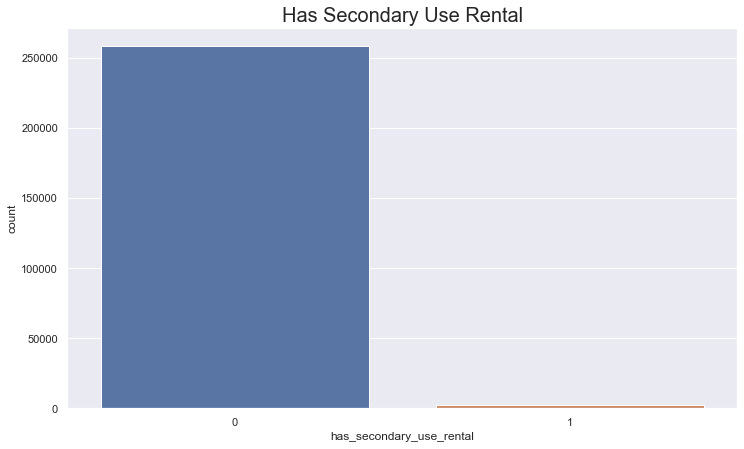

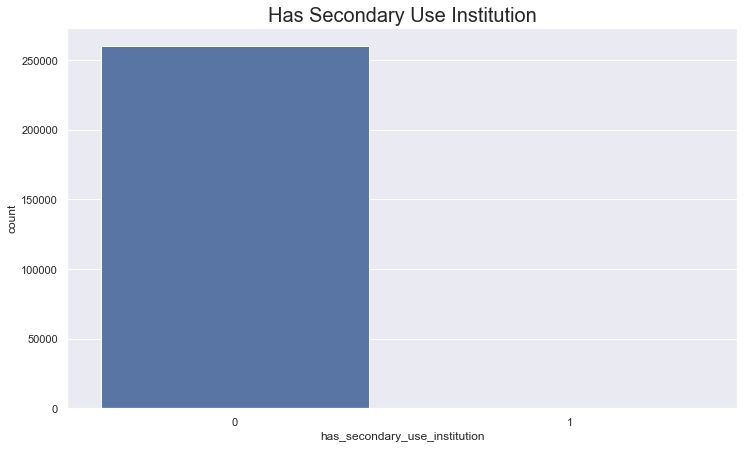

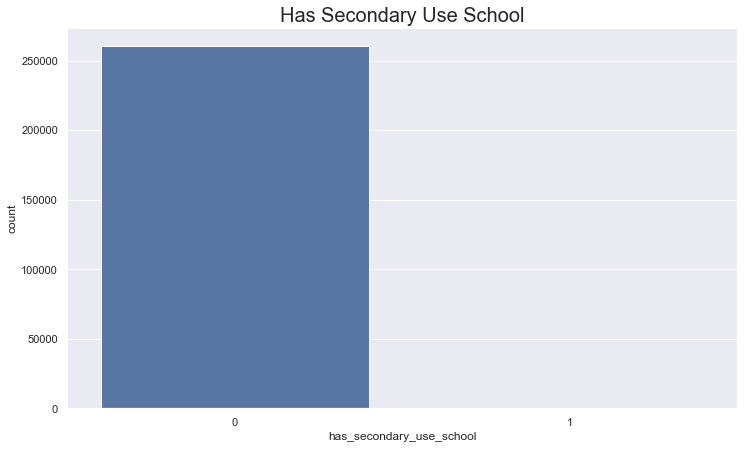

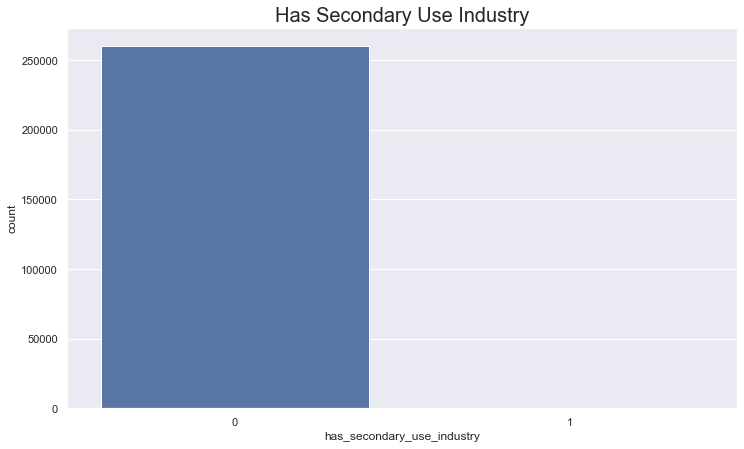

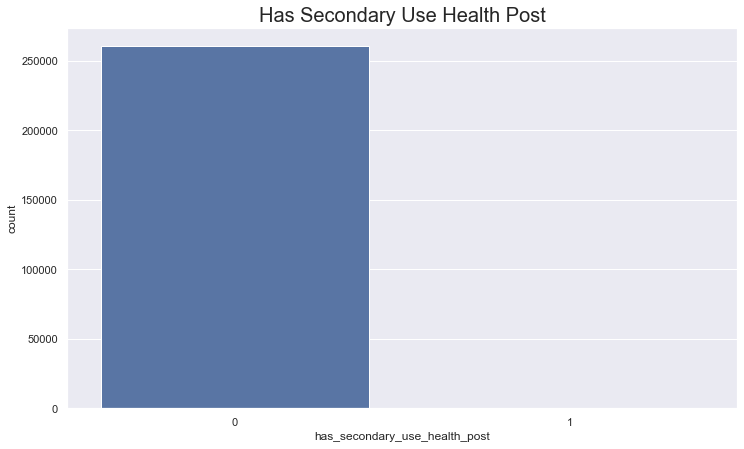

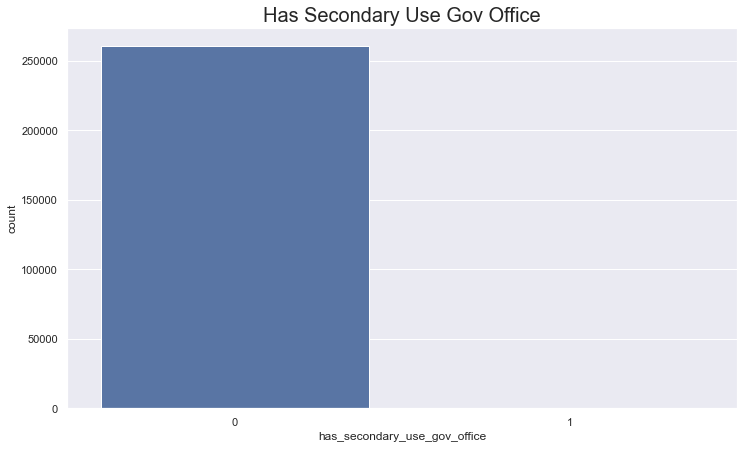

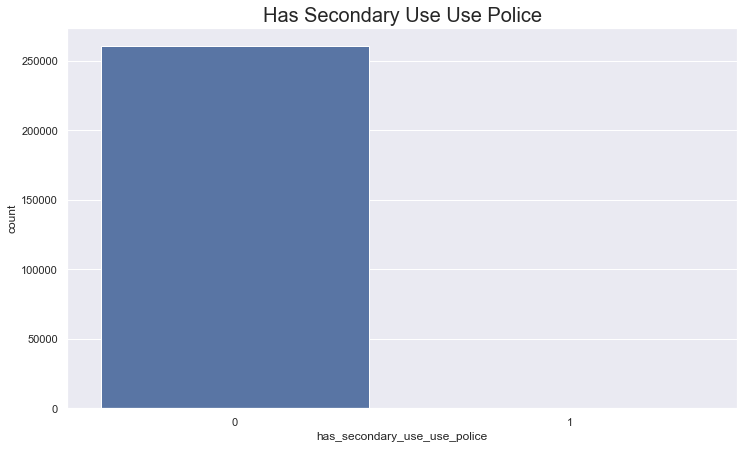

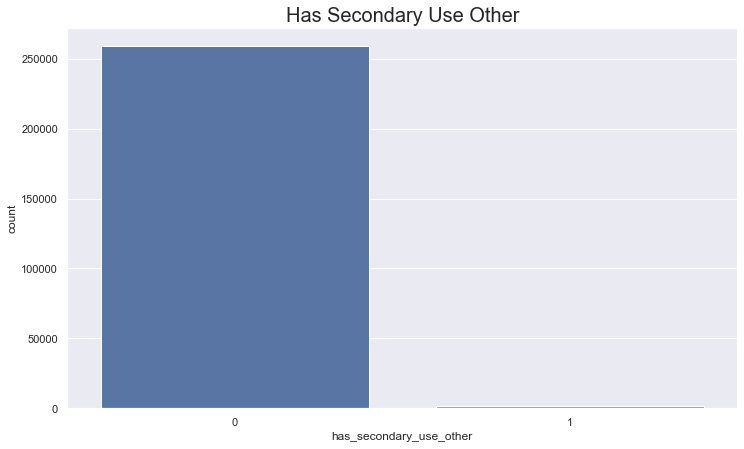

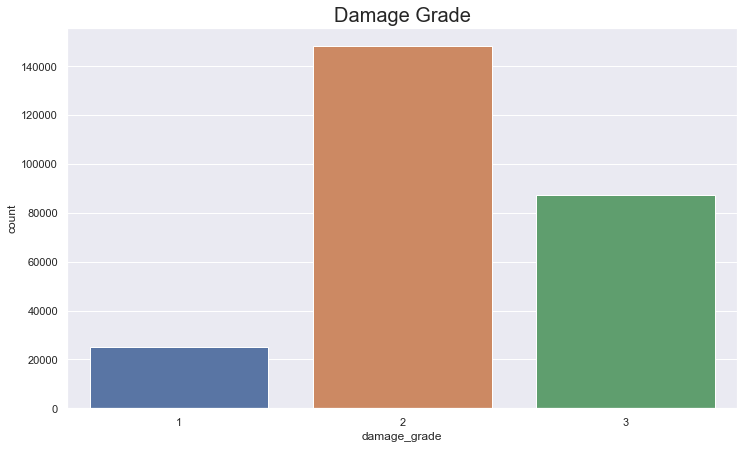

In [25]:
#columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
columns=df_train.select_dtypes(include='number').columns.to_list()[4:]
for col_name in columns:
        plt.figure(figsize=(12,7))
        sns.countplot(x=col_name, data=df_train)
        plt.title(col_name.replace("_"," ").title(), fontsize=20)
        plt.show()

In [26]:
columns=df_train.select_dtypes(include='number').columns.to_list()[1:]
columns

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'damage_grade']

In [27]:
columns

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'damage_grade']

In [28]:
#!pip install seaborn --upgrade

<Figure size 792x360 with 0 Axes>

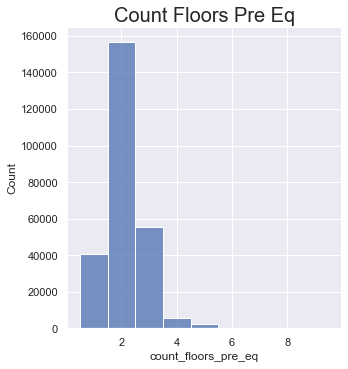

<Figure size 792x360 with 0 Axes>

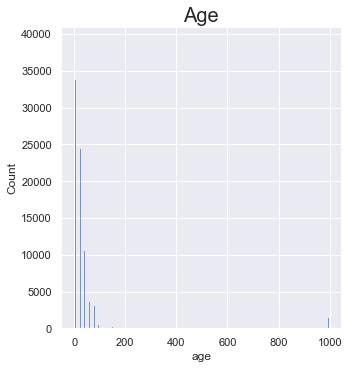

<Figure size 792x360 with 0 Axes>

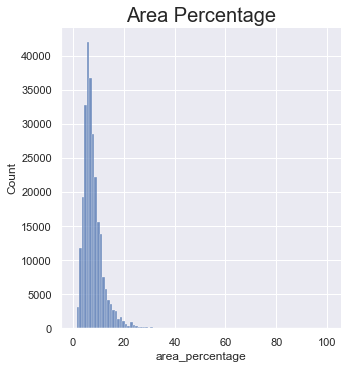

<Figure size 792x360 with 0 Axes>

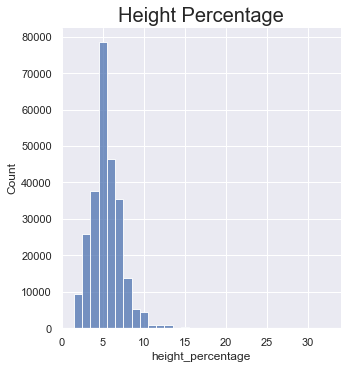

<Figure size 792x360 with 0 Axes>

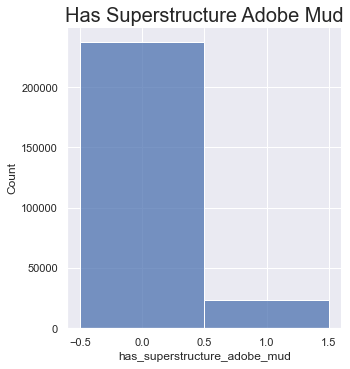

<Figure size 792x360 with 0 Axes>

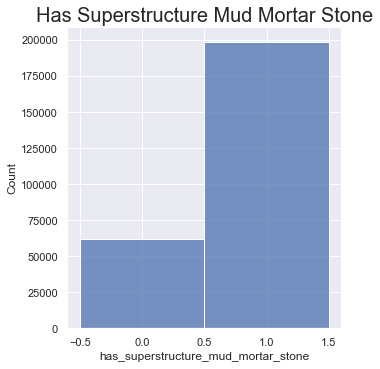

<Figure size 792x360 with 0 Axes>

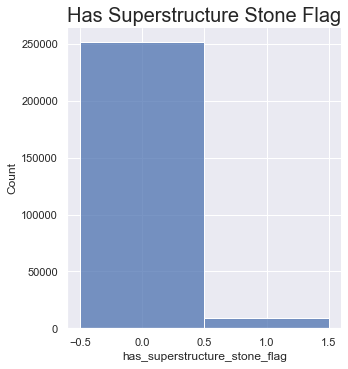

<Figure size 792x360 with 0 Axes>

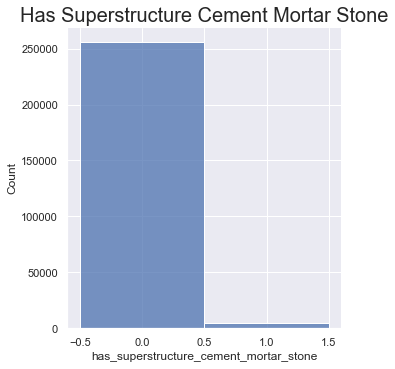

<Figure size 792x360 with 0 Axes>

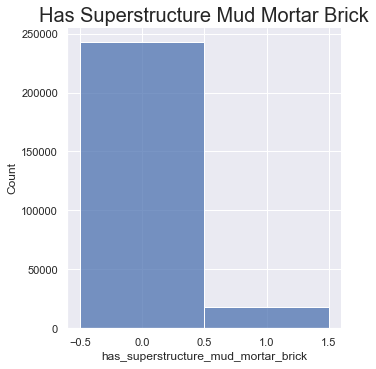

<Figure size 792x360 with 0 Axes>

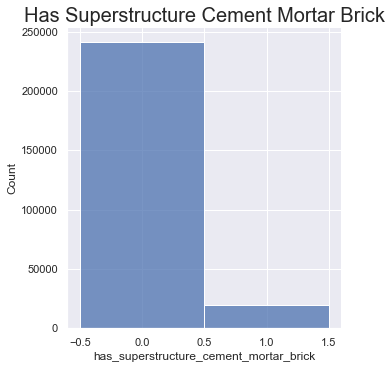

<Figure size 792x360 with 0 Axes>

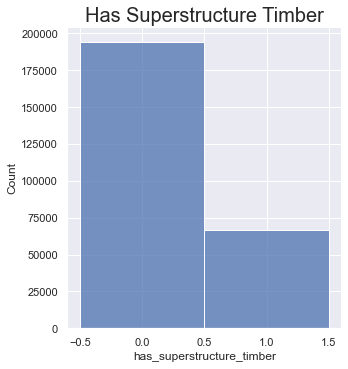

<Figure size 792x360 with 0 Axes>

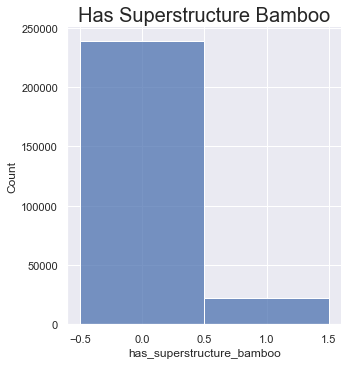

<Figure size 792x360 with 0 Axes>

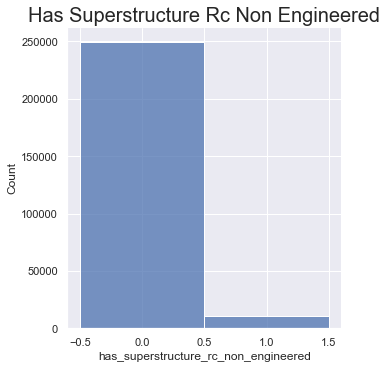

<Figure size 792x360 with 0 Axes>

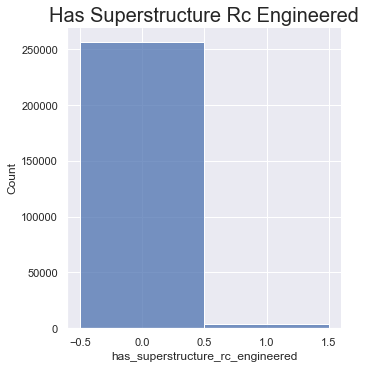

<Figure size 792x360 with 0 Axes>

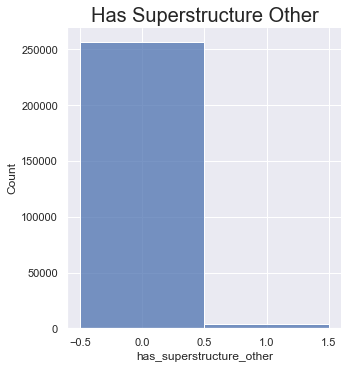

<Figure size 792x360 with 0 Axes>

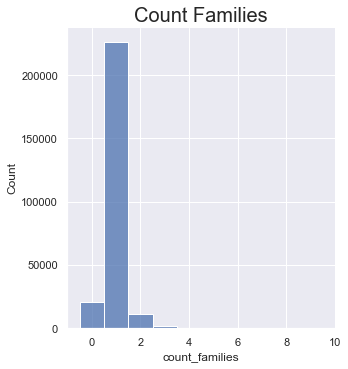

<Figure size 792x360 with 0 Axes>

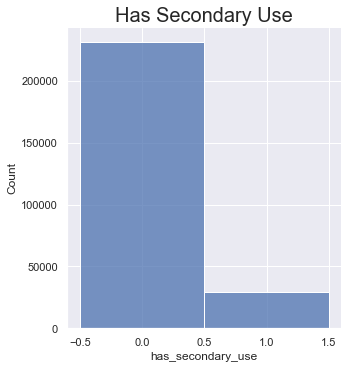

<Figure size 792x360 with 0 Axes>

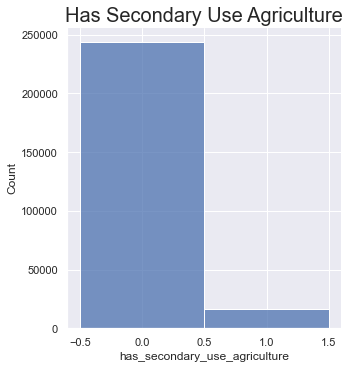

<Figure size 792x360 with 0 Axes>

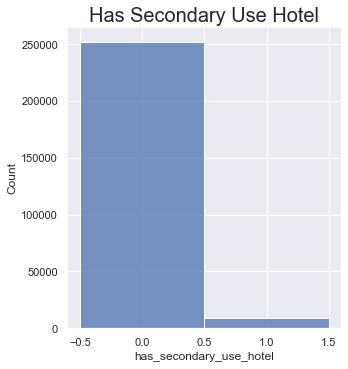

<Figure size 792x360 with 0 Axes>

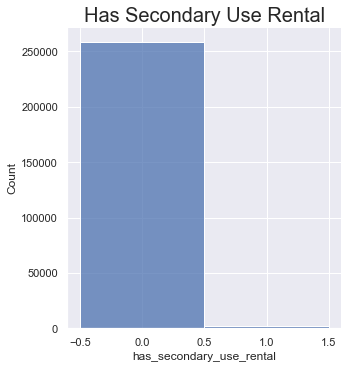

<Figure size 792x360 with 0 Axes>

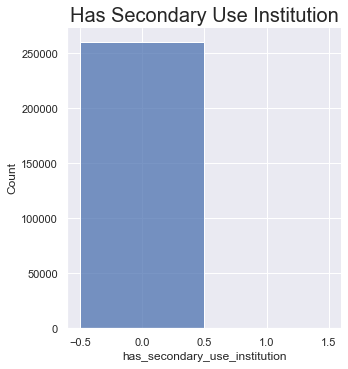

<Figure size 792x360 with 0 Axes>

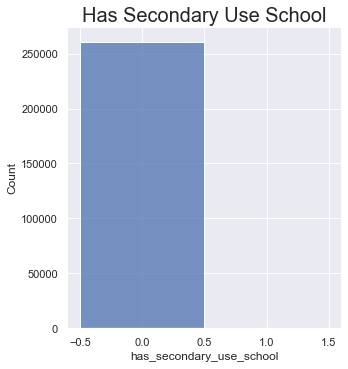

<Figure size 792x360 with 0 Axes>

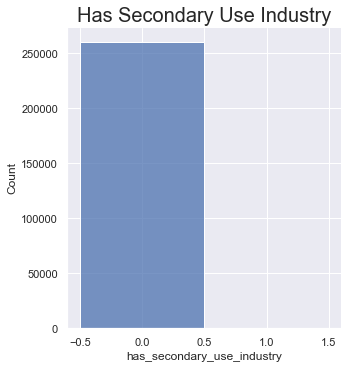

<Figure size 792x360 with 0 Axes>

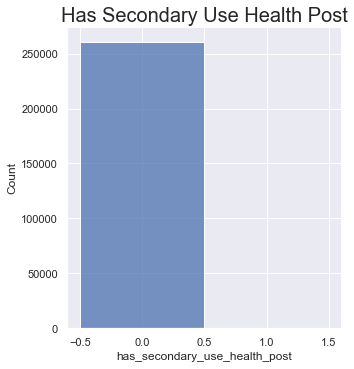

<Figure size 792x360 with 0 Axes>

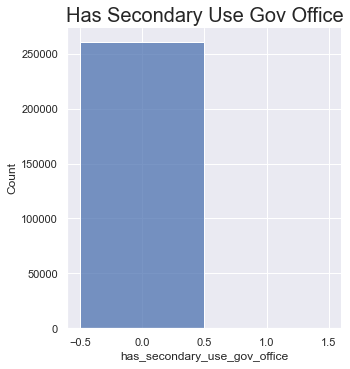

<Figure size 792x360 with 0 Axes>

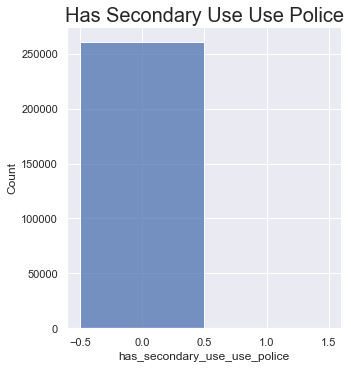

<Figure size 792x360 with 0 Axes>

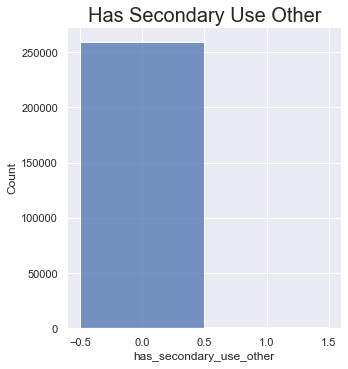

<Figure size 792x360 with 0 Axes>

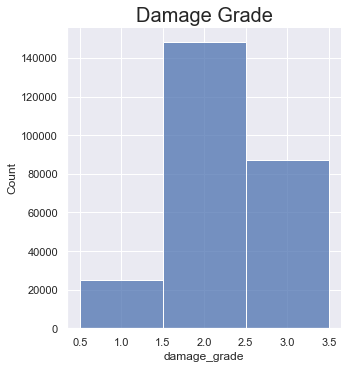

In [29]:
columns=df_train.select_dtypes(include='number').columns.to_list()[4:]
for col_name in columns:
        #sns.countplot(x=col_name, data=df_train)
        plt.figure(figsize=(11,5))
        sns.displot(df_train, x=col_name, discrete=True)
        plt.title(col_name.replace("_"," ").title(), fontsize=20)
        plt.show()

In [30]:
df_train.select_dtypes(include='number').columns.to_list()[4:]


['count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'damage_grade']

In [31]:
df_train.has_secondary_use_other.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

### Edad de las construcciones

In [32]:
df_train_age = df_train.age.value_counts()\
               .reset_index()\
               .rename(columns = {'index': 'ages', 'age': 'total'}, inplace = False)\
               .sort_values(by='ages',ascending=True)
#

In [33]:
df_train_age

,ages,total
4,0,26041
2,5,33697
0,10,38896
1,15,36010
3,20,32182
5,25,24366
6,30,18028
7,35,10710
8,40,10559
10,45,4711


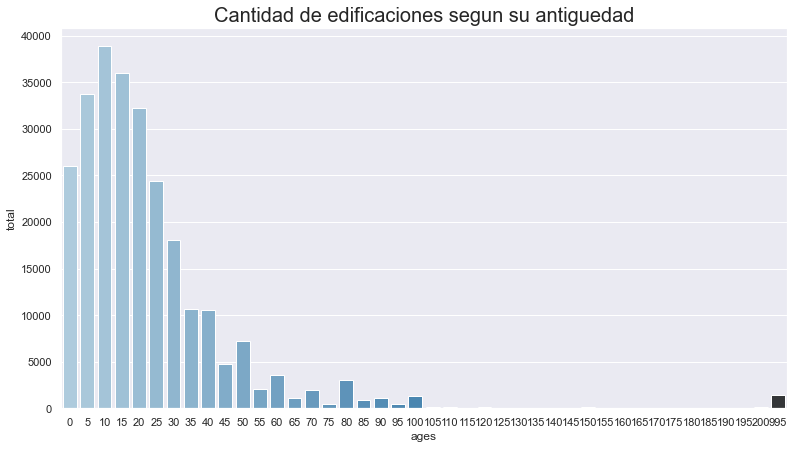

In [34]:
plt.figure(figsize=(13,7))
plt.title('Cantidad de edificaciones segun su antiguedad', fontsize=20)

sns.barplot(x="ages", y="total", data=df_train_age, palette="Blues_d")



In [123]:
df_train['age']

0         30
1         10
2         10
3         10
4         30
          ..
260596    55
260597     0
260598    55
260599    10
260600    10
Name: age, Length: 260601, dtype: int64

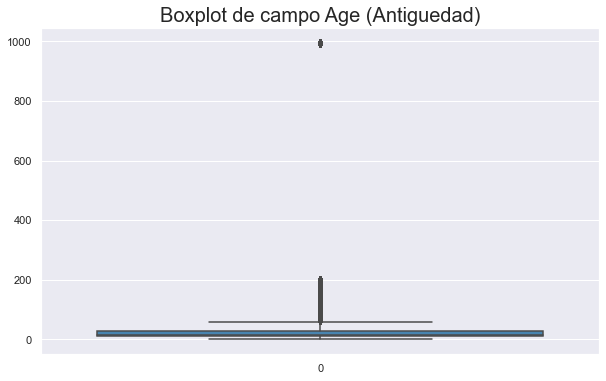

In [127]:
plt.figure(figsize=(10,6))
plt.title('Boxplot de campo Age (Antiguedad)', fontsize=20)
sns.boxplot(data=df_train['age'], palette="Blues_d")


In [35]:
df_train_age

,ages,total
4,0,26041
2,5,33697
0,10,38896
1,15,36010
3,20,32182
5,25,24366
6,30,18028
7,35,10710
8,40,10559
10,45,4711


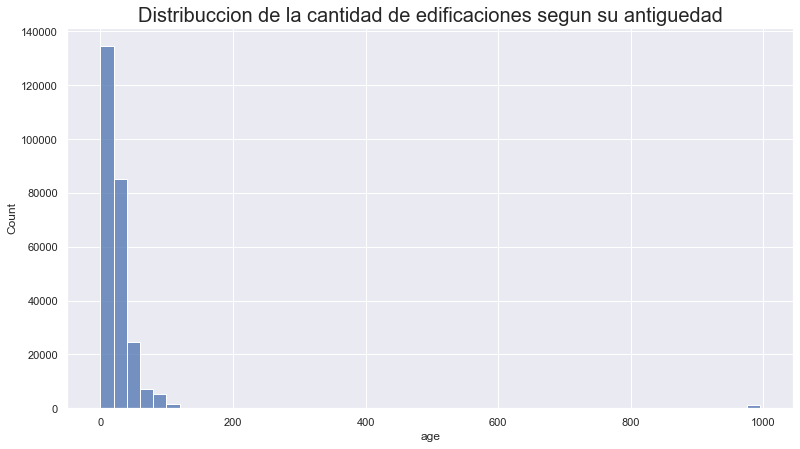

In [36]:
plt.figure(figsize=(13,7))
plt.title('Distribuccion de la cantidad de edificaciones segun su antiguedad', fontsize=20)
#sns.histplot(data=df_train_age, x="total",bins=1000 )
sns.histplot(data=df_train, x="age", bins=50)


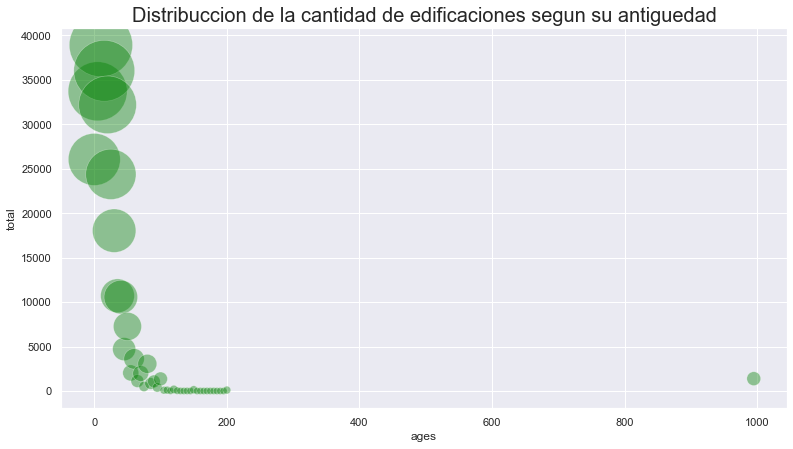

In [37]:

plt.figure(figsize=(13,7))
plt.title('Distribuccion de la cantidad de edificaciones segun su antiguedad', fontsize=20)

sns.scatterplot(data=df_train_age, x="ages", y="total", size="total", 
                 legend=False, sizes=(50, 4000), alpha=.4, color="green")



In [38]:
df_train['total'] = 1
df_train.loc[df_train.age > 800,:].groupby(['count_floors_pre_eq'])['total'].count().to_frame()

,total
count_floors_pre_eq,
1,169
2,869
3,285
4,34
5,28
6,5


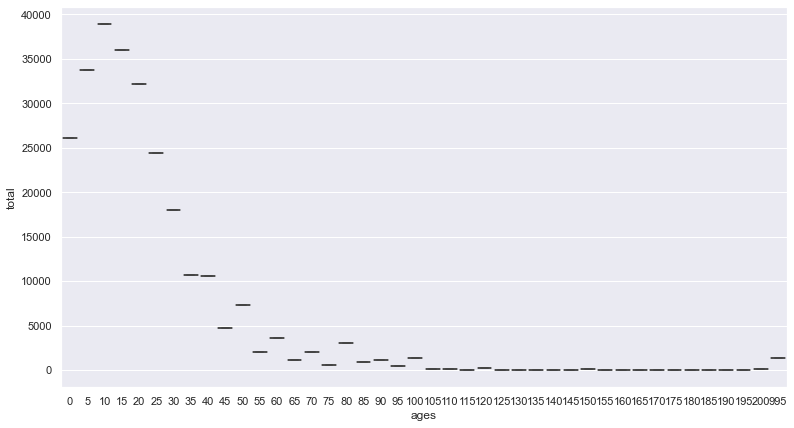

In [39]:
plt.figure(figsize=(13,7))

sns.boxplot(data = df_train_age, x='ages', y='total')


In [40]:
#sns.catplot(data=df_train_age, kind="violin", x="ages", y="total", hue="smoker", split=True)


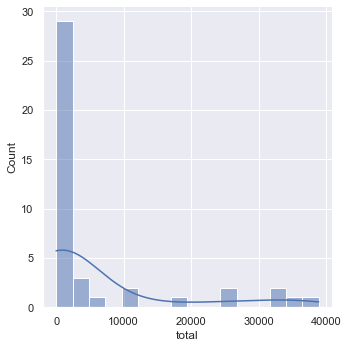

In [41]:
#df_train_age.count_plots()
#sns.catplot(x='total',  kind="bar", data=df_train_age)
sns.displot(data=df_train_age, x="total", kde=True)



### Cuales fueron los usos de los edificios dañados

En este caso se analizaran las columnas 

> "has_secondary_use"             
> "has_secondary_use_agriculture"  
> "has_secondary_use_hotel"     
> "has_secondary_use_rental"         
> "has_secondary_use_institution"  
> "has_secondary_use_school"   
> "has_secondary_use_industry"     
> "has_secondary_use_health_post"  
> "has_secondary_use_gov_office"         
> "has_secondary_use_use_police"   
> "has_secondary_use_other"

para ver segun estas columnnas binarias cual era el uso de la construccion

In [42]:
columns_names  = ["has_secondary_use"             
,"has_secondary_use_agriculture"
,"has_secondary_use_hotel"     
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"      
,"has_secondary_use_use_police"
,"has_secondary_use_other"]
for column_name in columns_names:
    print(column_name)
    print(df_train[column_name].unique())

has_secondary_use
[0 1]
has_secondary_use_agriculture
[0 1]
has_secondary_use_hotel
[0 1]
has_secondary_use_rental
[0 1]
has_secondary_use_institution
[0 1]
has_secondary_use_school
[0 1]
has_secondary_use_industry
[0 1]
has_secondary_use_health_post
[0 1]
has_secondary_use_gov_office
[0 1]
has_secondary_use_use_police
[0 1]
has_secondary_use_other
[0 1]


In [43]:
df_train["sum_of_uses"] = df_train.loc[:,["has_secondary_use"             
,"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"
,"has_secondary_use_other"]].sum(axis=1)

In [44]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,3,1,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,2,1,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,3,1,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,2,1,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,2,1,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,3,1,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,3,1,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,2,1,0


In [45]:
df_train.sum_of_uses.value_counts()

0    231445
2     28599
3       557
Name: sum_of_uses, dtype: int64

In [46]:
df_train.loc[df_train.sum_of_uses==3,["has_secondary_use"             
,"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"
,"has_secondary_use_other","sum_of_uses"]]

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,sum_of_uses
304,1,1,0,0,0,0,0,0,0,0,1,3
1408,1,1,0,0,0,0,0,0,0,0,1,3
1593,1,1,0,0,0,0,0,0,0,0,1,3
2329,1,1,0,0,0,0,0,0,0,0,1,3
3704,1,0,1,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
256746,1,1,0,0,0,0,0,0,0,0,1,3
257939,1,1,0,0,0,0,0,0,0,0,1,3
258184,1,1,0,0,0,0,0,0,0,0,1,3
258755,1,1,0,0,0,0,0,0,0,0,1,3


In [47]:
df_train["sum_of_uses_2"] = df_train.loc[:,[        
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]].sum(axis=1)

In [48]:
df_train.sum_of_uses_2.value_counts()

0    232222
1     28379
Name: sum_of_uses_2, dtype: int64

In [49]:
df_train_uses = df_train.loc[:,["building_id",             
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]]

In [50]:
df_train_uses

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police
0,802906,0,0,0,0,0,0,0,0,0
1,28830,0,0,0,0,0,0,0,0,0
2,94947,0,0,0,0,0,0,0,0,0
3,590882,0,0,0,0,0,0,0,0,0
4,201944,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
260596,688636,0,0,0,0,0,0,0,0,0
260597,669485,0,0,0,0,0,0,0,0,0
260598,602512,0,0,0,0,0,0,0,0,0
260599,151409,0,0,0,0,0,0,0,0,0


In [51]:
df_train_uses["sum"] = df_train_uses.loc[:,[            
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]].sum(axis=1)

In [52]:
#df_train_uses['sum'].value_counts()

Se omiten las columnas others para el analisis ya que generalmente estan acompñadas por una de estas columnas

In [53]:
df_train_uses["type_of_use"] = df_train_uses.loc[:,[            
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]].idxmax(axis = 1, skipna = True)

In [54]:
df_train_uses

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,sum,type_of_use
0,802906,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
1,28830,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
2,94947,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
3,590882,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
4,201944,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
260597,669485,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
260598,602512,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
260599,151409,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture


In [55]:
df_train_uses[df_train_uses.building_id==333020]

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,sum,type_of_use
5,333020,1,0,0,0,0,0,0,0,0,1,has_secondary_use_agriculture


In [56]:
df_train_uses['type_of_use'] = df_train_uses.loc[df_train_uses['sum'] == 1,'type_of_use'].replace({'has_secondary_use_':''},regex=True)

In [57]:
df_train_uses[df_train_uses['sum'] == 1]

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,sum,type_of_use
5,333020,1,0,0,0,0,0,0,0,0,1,agriculture
20,793397,1,0,0,0,0,0,0,0,0,1,agriculture
26,973909,1,0,0,0,0,0,0,0,0,1,agriculture
45,440102,0,0,1,0,0,0,0,0,0,1,rental
57,552720,1,0,0,0,0,0,0,0,0,1,agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...
260579,977263,1,0,0,0,0,0,0,0,0,1,agriculture
260584,317439,1,0,0,0,0,0,0,0,0,1,agriculture
260587,603159,1,0,0,0,0,0,0,0,0,1,agriculture
260591,560805,1,0,0,0,0,0,0,0,0,1,agriculture


In [58]:
df_train_uses['type_of_use'].value_counts().sort_values(ascending=False)

agriculture    16777
hotel           8763
rental          2111
industry         279
institution      245
school            94
health_post       49
gov_office        38
use_police        23
Name: type_of_use, dtype: int64

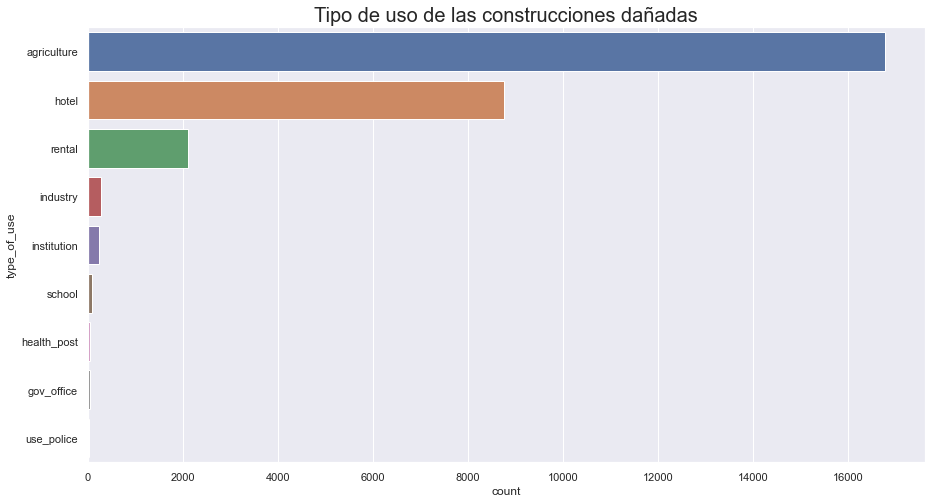

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(y='type_of_use', data=df_train_uses ,order = df_train_uses['type_of_use'].value_counts().index)
plt.title('Tipo de uso de las construcciones dañadas', fontsize=20)
plt.show()

Conclusion

Las construcciones principalmente afectadas fueron las agricolas. Se observa un importante daño tambien en lo que son edificaciones de hoteleria, 

Cabe aclarar que para este caso finalmente tuvimos que omitir las columnas o has_secondary_use y has_secondary_use_other

In [60]:
df_train['has_secondary_use_hotel'].value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64

In [61]:
df_train_merge = df_train.merge(df_train_uses)

In [62]:
df_train_merge

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,sum,type_of_use
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,3,1,0,0,0,NaN
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,2,1,0,0,0,NaN
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,3,1,0,0,0,NaN
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,2,1,0,0,0,NaN
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,3,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,2,1,0,0,0,NaN
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,3,1,0,0,0,NaN
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,3,1,0,0,0,NaN
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,2,1,0,0,0,NaN


In [63]:
df_train_merge.type_of_use.fillna('others', inplace=True)

In [64]:
df_train_merge[df_train_merge.age>500].type_of_use.value_counts()

others         1239
agriculture      73
hotel            53
rental           24
institution       1
Name: type_of_use, dtype: int64

In [65]:
df_train_merge.type_of_use.value_counts()

others         232222
agriculture     16777
hotel            8763
rental           2111
industry          279
institution       245
school             94
health_post        49
gov_office         38
use_police         23
Name: type_of_use, dtype: int64

In [66]:
df_train_merge['count_type_of_use'] = df_train_merge.groupby(by=['type_of_use'])['type_of_use'].transform('sum')

In [67]:
df_train_merge['count_type_of_use'] = df_train_merge.groupby(by=['type_of_use'])['total'].transform('count')

In [68]:
 df_train_merge.groupby(['type_of_use','total'])['total'].count()

type_of_use  total
agriculture  1         16777
gov_office   1            38
health_post  1            49
hotel        1          8763
industry     1           279
institution  1           245
others       1        232222
rental       1          2111
school       1            94
use_police   1            23
Name: total, dtype: int64

In [69]:
df_train_merge

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,sum,type_of_use,count_type_of_use
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,3,1,0,0,0,others,232222
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,2,1,0,0,0,others,232222
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,3,1,0,0,0,others,232222
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,2,1,0,0,0,others,232222
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,3,1,0,0,0,others,232222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,2,1,0,0,0,others,232222
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,3,1,0,0,0,others,232222
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,3,1,0,0,0,others,232222
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,2,1,0,0,0,others,232222


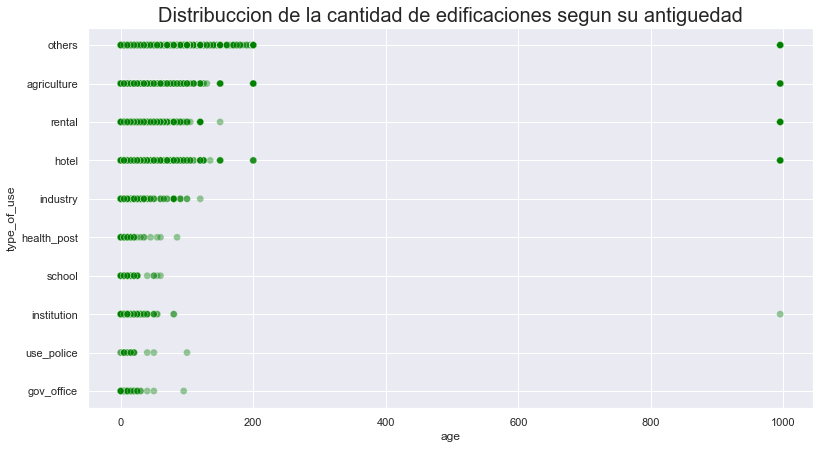

In [70]:
plt.figure(figsize=(13,7))
plt.title('Distribuccion de la cantidad de edificaciones segun su antiguedad', fontsize=20)

sns.scatterplot(data=df_train_merge, x="age", y="type_of_use", size="total", 
                 legend=False, sizes=(50, 4000), alpha=.4, color="green")

In [71]:
df_train_merge['type_of_use'].value_counts().index

Index(['others', 'agriculture', 'hotel', 'rental', 'industry', 'institution',
       'school', 'health_post', 'gov_office', 'use_police'],
      dtype='object')

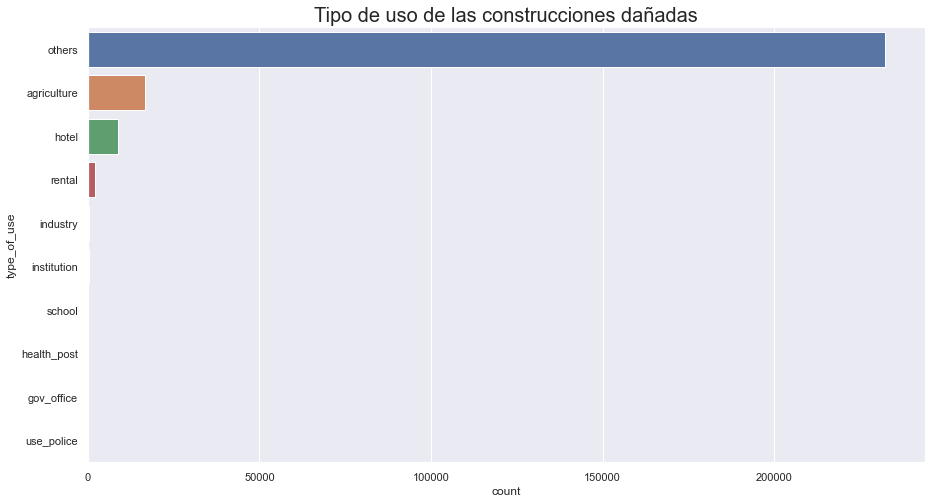

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(y='type_of_use', data=df_train_merge ,order = df_train_merge['type_of_use'].value_counts().index)
plt.title('Tipo de uso de las construcciones dañadas', fontsize=20)
plt.show()

In [73]:
df_train_merge.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,sum,type_of_use,count_type_of_use
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,3,1,0,0,0,others,232222
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,2,1,0,0,0,others,232222
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,3,1,0,0,0,others,232222
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,2,1,0,0,0,others,232222
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,3,1,0,0,0,others,232222


In [74]:
df_train_merge.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [75]:
df_train_merge.has_secondary_use.value_counts()

0    231445
1     29156
Name: has_secondary_use, dtype: int64

In [76]:
df_train_merge.has_secondary_use_other.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

In [77]:
df_train_merge.has_secondary_use_agriculture.value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

In [78]:
df_train_merge.has_secondary_use_hotel.value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64

In [79]:
df_train_merge.has_secondary_use_rental.value_counts()

0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64

In [80]:
  df_train_merge.groupby(['type_of_use','total'])['total'].count()

type_of_use  total
agriculture  1         16777
gov_office   1            38
health_post  1            49
hotel        1          8763
industry     1           279
institution  1           245
others       1        232222
rental       1          2111
school       1            94
use_police   1            23
Name: total, dtype: int64

In [81]:
df_train_merge.type_of_use.value_counts()

others         232222
agriculture     16777
hotel            8763
rental           2111
industry          279
institution       245
school             94
health_post        49
gov_office         38
use_police         23
Name: type_of_use, dtype: int64

In [82]:
df_train_merge.has_secondary_use.value_counts()

0    231445
1     29156
Name: has_secondary_use, dtype: int64

In [83]:
df_train_merge.has_secondary_use_other.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

In [84]:
#columna.value_counts()

In [85]:
def valoresHasSecondary(columna):
    
    #counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

    valores_0 = df_train_merge[df_train_merge[columna] == 0][columna].count()
    valores_1 = df_train_merge[df_train_merge[columna] == 1][columna].count()
    return columna,valores_0,valores_1

In [86]:
columns_names  = ["has_secondary_use"             
,"has_secondary_use_agriculture"
,"has_secondary_use_hotel"     
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"      
,"has_secondary_use_use_police"
,"has_secondary_use_other"]
row=[]
for col in columns_names:
        row.append(valoresHasSecondary(col))

In [87]:
df_train_merge[df_train_merge['has_secondary_use_rental'] == 1].has_secondary_use_use_police.count()

2111

In [88]:
df_train_merge['has_secondary_use_use_police']

0         0
1         0
2         0
3         0
4         0
         ..
260596    0
260597    0
260598    0
260599    0
260600    0
Name: has_secondary_use_use_police, Length: 260601, dtype: int64

In [89]:
row

[('has_secondary_use', 231445, 29156),
 ('has_secondary_use_agriculture', 243824, 16777),
 ('has_secondary_use_hotel', 251838, 8763),
 ('has_secondary_use_rental', 258490, 2111),
 ('has_secondary_use_institution', 260356, 245),
 ('has_secondary_use_school', 260507, 94),
 ('has_secondary_use_industry', 260322, 279),
 ('has_secondary_use_health_post', 260552, 49),
 ('has_secondary_use_gov_office', 260563, 38),
 ('has_secondary_use_use_police', 260578, 23),
 ('has_secondary_use_other', 259267, 1334)]

In [90]:
dfsecondary_use = pd.DataFrame(row,columns=["Columna", "Total_0", "Total_1"]) 
dfsecondary_use

,Columna,Total_0,Total_1
0,has_secondary_use,231445,29156
1,has_secondary_use_agriculture,243824,16777
2,has_secondary_use_hotel,251838,8763
3,has_secondary_use_rental,258490,2111
4,has_secondary_use_institution,260356,245
5,has_secondary_use_school,260507,94
6,has_secondary_use_industry,260322,279
7,has_secondary_use_health_post,260552,49
8,has_secondary_use_gov_office,260563,38
9,has_secondary_use_use_police,260578,23


In [91]:
dfsecondary_use['Total'] = dfsecondary_use['Total_0'] + dfsecondary_use['Total_1']

In [92]:
dfsecondary_use

,Columna,Total_0,Total_1,Total
0,has_secondary_use,231445,29156,260601
1,has_secondary_use_agriculture,243824,16777,260601
2,has_secondary_use_hotel,251838,8763,260601
3,has_secondary_use_rental,258490,2111,260601
4,has_secondary_use_institution,260356,245,260601
5,has_secondary_use_school,260507,94,260601
6,has_secondary_use_industry,260322,279,260601
7,has_secondary_use_health_post,260552,49,260601
8,has_secondary_use_gov_office,260563,38,260601
9,has_secondary_use_use_police,260578,23,260601


In [93]:
dfsecondary_use

,Columna,Total_0,Total_1,Total
0,has_secondary_use,231445,29156,260601
1,has_secondary_use_agriculture,243824,16777,260601
2,has_secondary_use_hotel,251838,8763,260601
3,has_secondary_use_rental,258490,2111,260601
4,has_secondary_use_institution,260356,245,260601
5,has_secondary_use_school,260507,94,260601
6,has_secondary_use_industry,260322,279,260601
7,has_secondary_use_health_post,260552,49,260601
8,has_secondary_use_gov_office,260563,38,260601
9,has_secondary_use_use_police,260578,23,260601


In [94]:
dfsecondary_use.T.sum(axis=1)

Columna    has_secondary_usehas_secondary_use_agriculture...
Total_0                                              2807742
Total_1                                                58869
Total                                                2866611
dtype: object

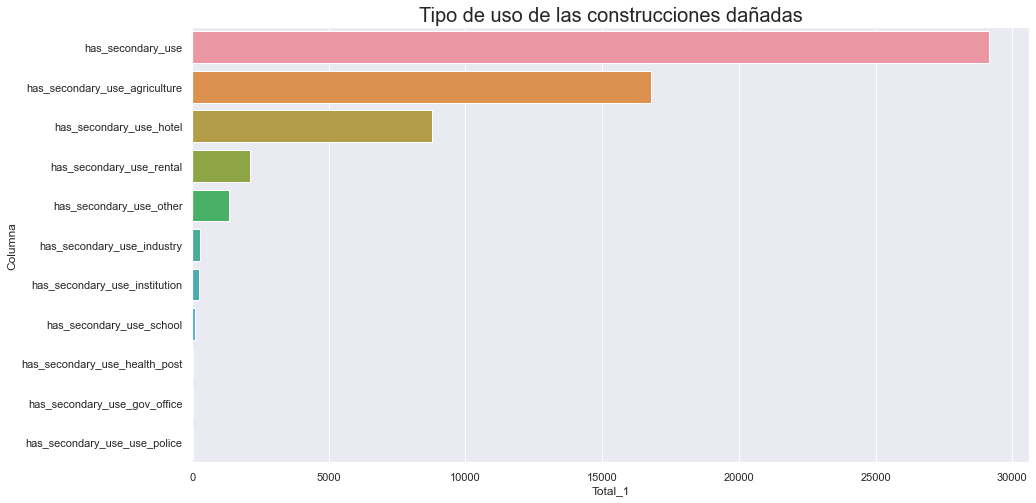

In [95]:
plt.figure(figsize=(15,8))
sns.barplot(y="Columna", x="Total_1", data=dfsecondary_use.sort_values(by='Total_1',ascending=False))
plt.title('Tipo de uso de las construcciones dañadas', fontsize=20)
plt.show()

In [96]:
#mismo grafico sin others

In [97]:
dfsecondary_use['Columna'] = dfsecondary_use['Columna'].replace({'has_secondary_use_':''}, regex=True)

In [98]:
dfsecondary_use

,Columna,Total_0,Total_1,Total
0,has_secondary_use,231445,29156,260601
1,agriculture,243824,16777,260601
2,hotel,251838,8763,260601
3,rental,258490,2111,260601
4,institution,260356,245,260601
5,school,260507,94,260601
6,industry,260322,279,260601
7,health_post,260552,49,260601
8,gov_office,260563,38,260601
9,use_police,260578,23,260601


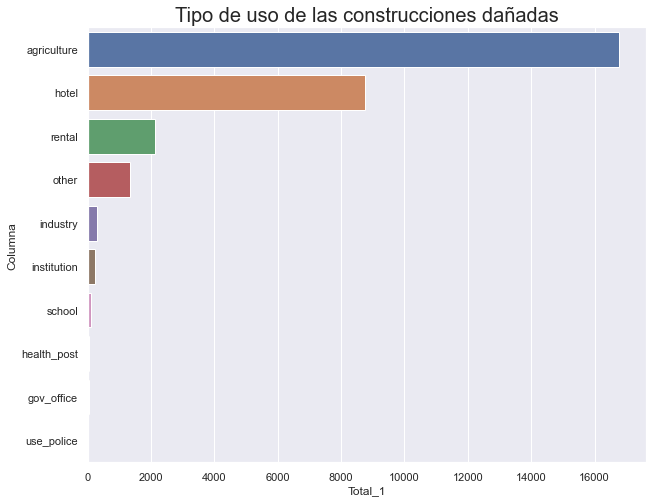

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(y="Columna", x="Total_1", data=dfsecondary_use[dfsecondary_use.Columna != 'has_secondary_use'].sort_values(by='Total_1',ascending=False))
plt.title('Tipo de uso de las construcciones dañadas', fontsize=20)
plt.show()

In [100]:
df_train["type_of_superstructure"] = df_train.loc[:,[            
'has_superstructure_adobe_mud',
'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick',
'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
'has_superstructure_rc_engineered', 'has_superstructure_other']].idxmax(axis = 1, skipna = True)

In [101]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,type_of_superstructure
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,3,1,0,0,has_superstructure_adobe_mud
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,2,1,0,0,has_superstructure_mud_mortar_stone
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,3,1,0,0,has_superstructure_mud_mortar_stone
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,2,1,0,0,has_superstructure_mud_mortar_stone
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,3,1,0,0,has_superstructure_adobe_mud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,2,1,0,0,has_superstructure_mud_mortar_stone
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,3,1,0,0,has_superstructure_mud_mortar_stone
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,3,1,0,0,has_superstructure_mud_mortar_stone
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,2,1,0,0,has_superstructure_cement_mortar_brick


In [102]:
df_train['type_of_superstructure'] = df_train.type_of_superstructure.replace({'has_superstructure_':''},regex=True)

In [103]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,type_of_superstructure
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,3,1,0,0,adobe_mud
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,3,1,0,0,adobe_mud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,2,1,0,0,cement_mortar_brick


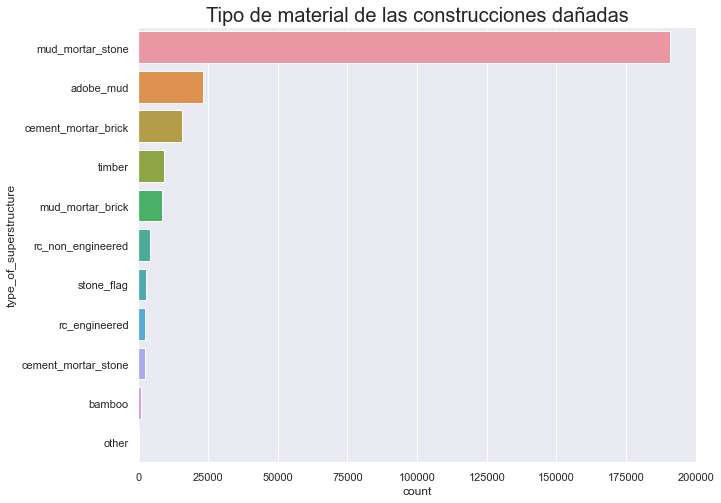

In [104]:
plt.figure(figsize=(10,8))
sns.countplot(y='type_of_superstructure', data=df_train ,order = df_train['type_of_superstructure'].value_counts().index)
plt.title('Tipo de material de las construcciones dañadas', fontsize=20)
plt.show()

### Area vs Altura

In [105]:
#https://seaborn.pydata.org/generated/seaborn.relplot.html

Text(0.5, 1.0, 'Altura vs Area')

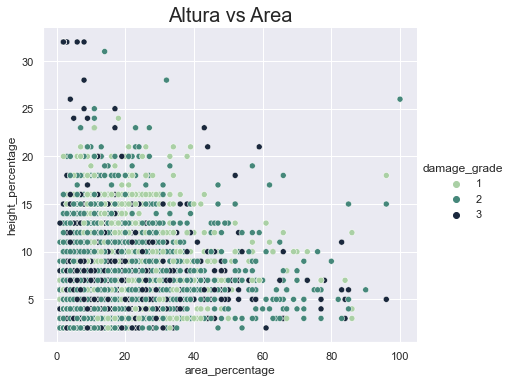

In [106]:
#hue="damage_grade"
sns.relplot(
data=df_train,
x="area_percentage", y="height_percentage",
 aspect=11.7/10,hue="damage_grade",palette="ch:r=-.5,l=.75"
)
plt.title('Altura vs Area', fontsize=20)


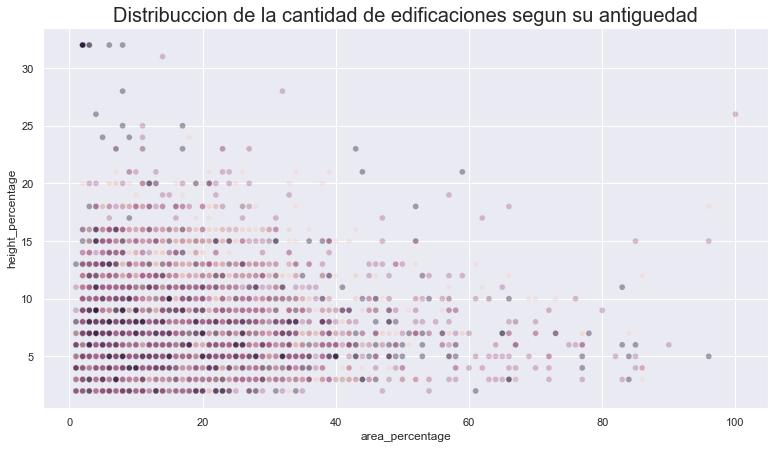

In [107]:
plt.figure(figsize=(13,7))
plt.title('Distribuccion de la cantidad de edificaciones segun su antiguedad', fontsize=20)

sns.scatterplot(data=df_train, x="area_percentage", y="height_percentage", hue="damage_grade", 
                 legend=False, sizes=(50, 100), alpha=.4, color="green")

In [108]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,type_of_superstructure
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,3,1,0,0,adobe_mud
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,3,1,0,0,adobe_mud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,2,1,0,0,cement_mortar_brick


Text(0.5, 1.0, 'Altura vs Area')

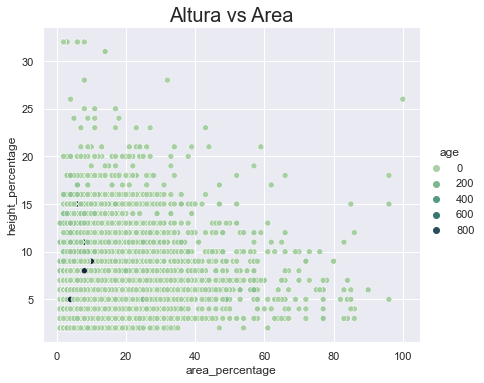

In [109]:
#hue="damage_grade"
sns.relplot(
data=df_train,
x="area_percentage", y="height_percentage",sizes=(10,1000),
 aspect=11.7/10,hue="age",palette="ch:r=-.5,l=.75"
)
plt.title('Altura vs Area', fontsize=20)

In [110]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,total,sum_of_uses,sum_of_uses_2,type_of_superstructure
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,3,1,0,0,adobe_mud
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,3,1,0,0,adobe_mud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,2,1,0,0,mud_mortar_stone
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,3,1,0,0,mud_mortar_stone
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,2,1,0,0,cement_mortar_brick


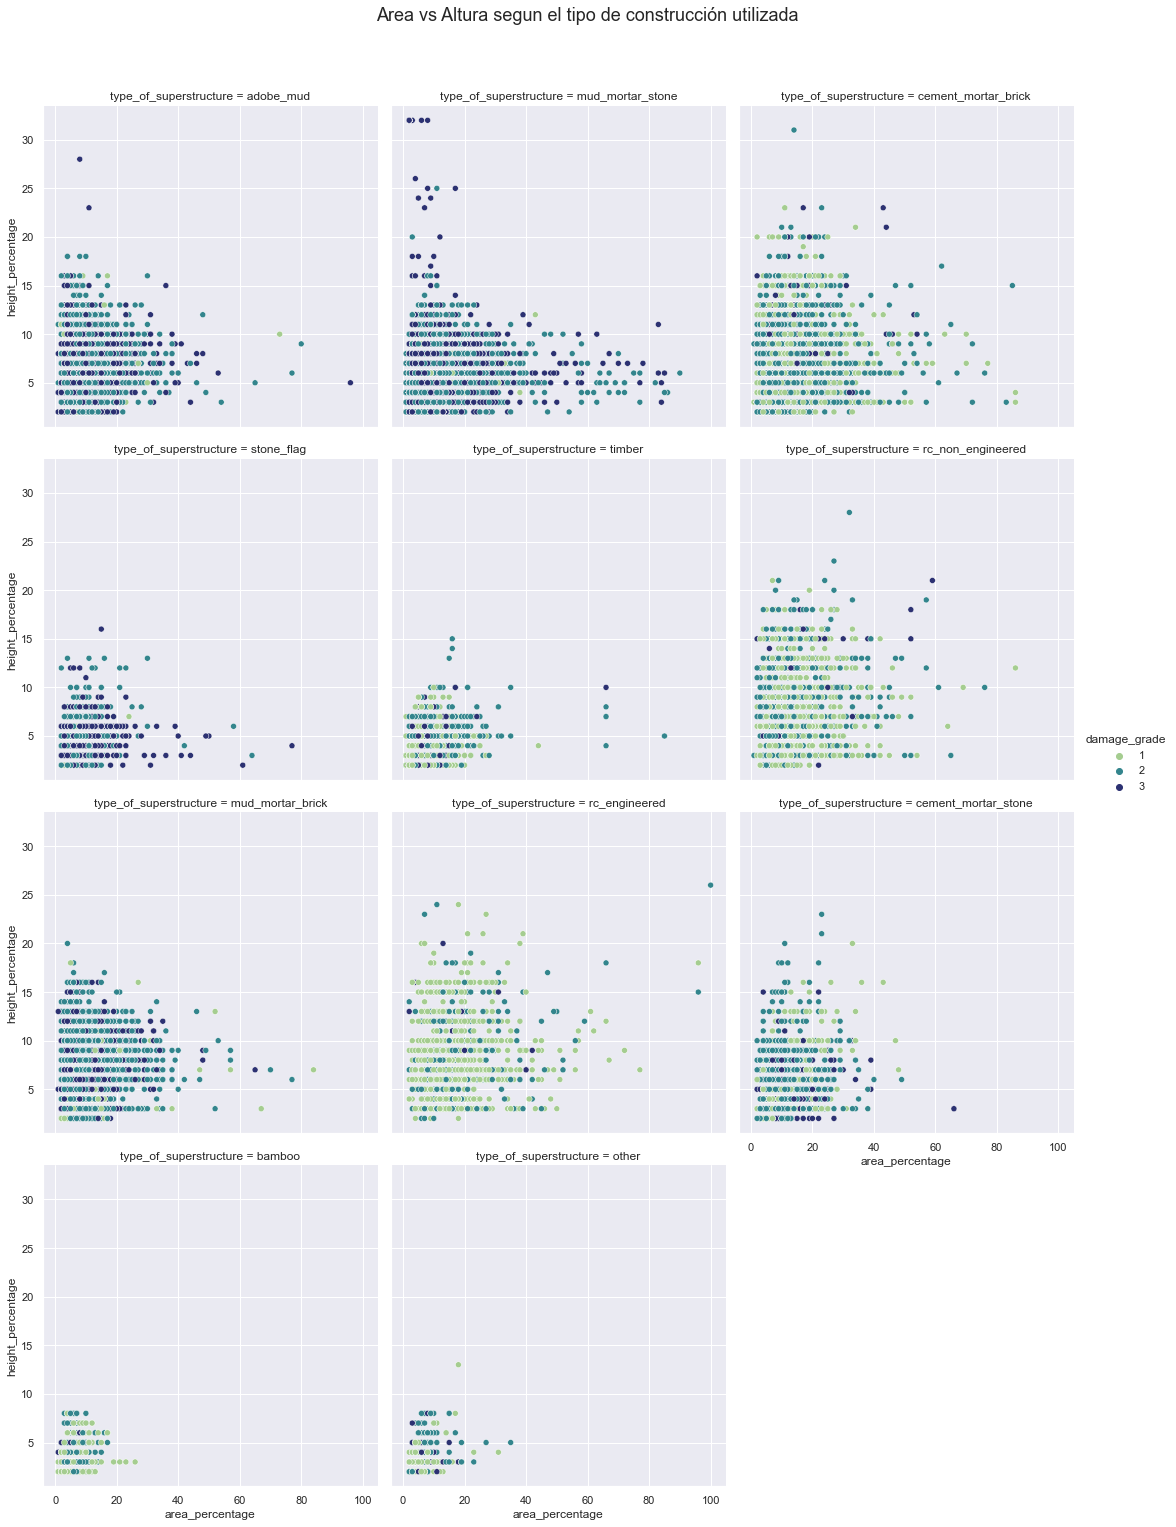

In [111]:


g = sns.relplot(data=df_train, x="area_percentage", y="height_percentage", hue="damage_grade", col="type_of_superstructure"
            , col_wrap=3, palette='crest')
#.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
#plt.title('Altura vs Area separado por tipo de estructura', fontsize=20)
g.fig.suptitle("Area vs Altura segun el tipo de construcción utilizada ", fontsize = 18, x=0.5, y=1.05)

leg = g._legend
  # change the values here to move the legend box

Area vs Altura basados en segun la columna

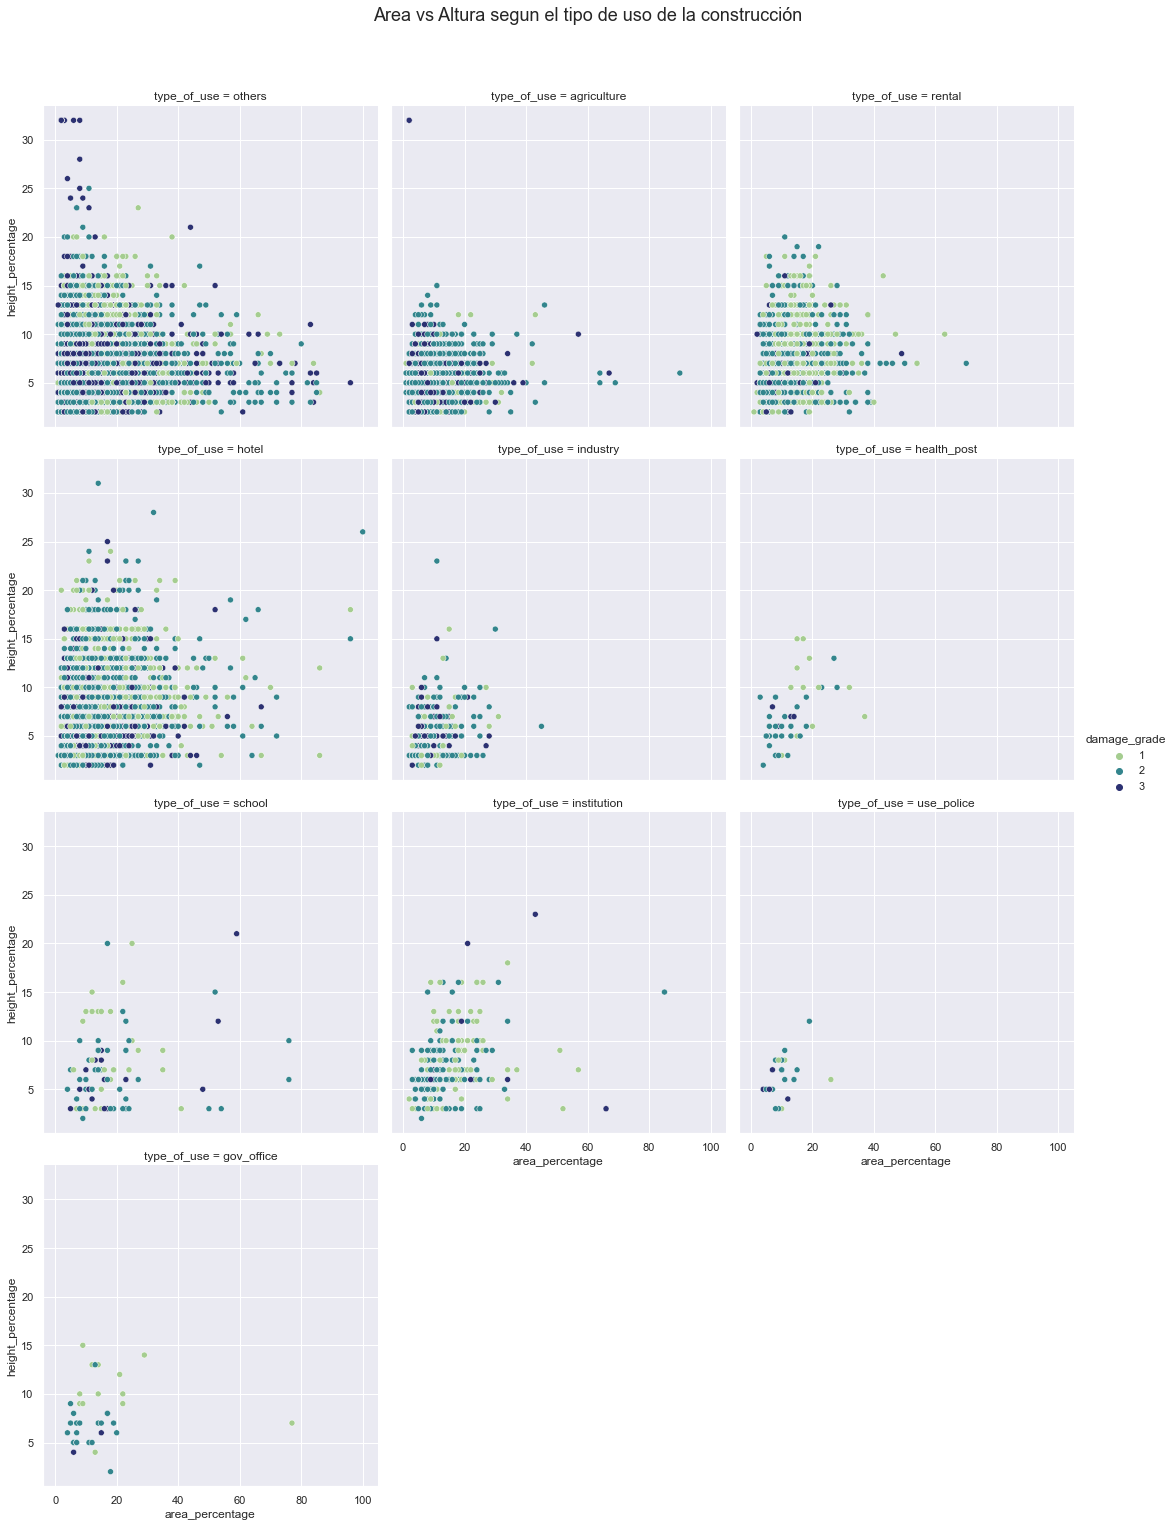

In [112]:
g = sns.relplot(data=df_train_merge, x="area_percentage", y="height_percentage", hue="damage_grade", col="type_of_use"
            , col_wrap=3, palette='crest')
#.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
#plt.title('Altura vs Area separado por tipo de estructura', fontsize=20)
g.fig.suptitle("Area vs Altura segun el tipo de uso de la construcción ", fontsize = 18, x=0.5, y=1.05)

leg = g._legend
  # change the values here to move the legend box

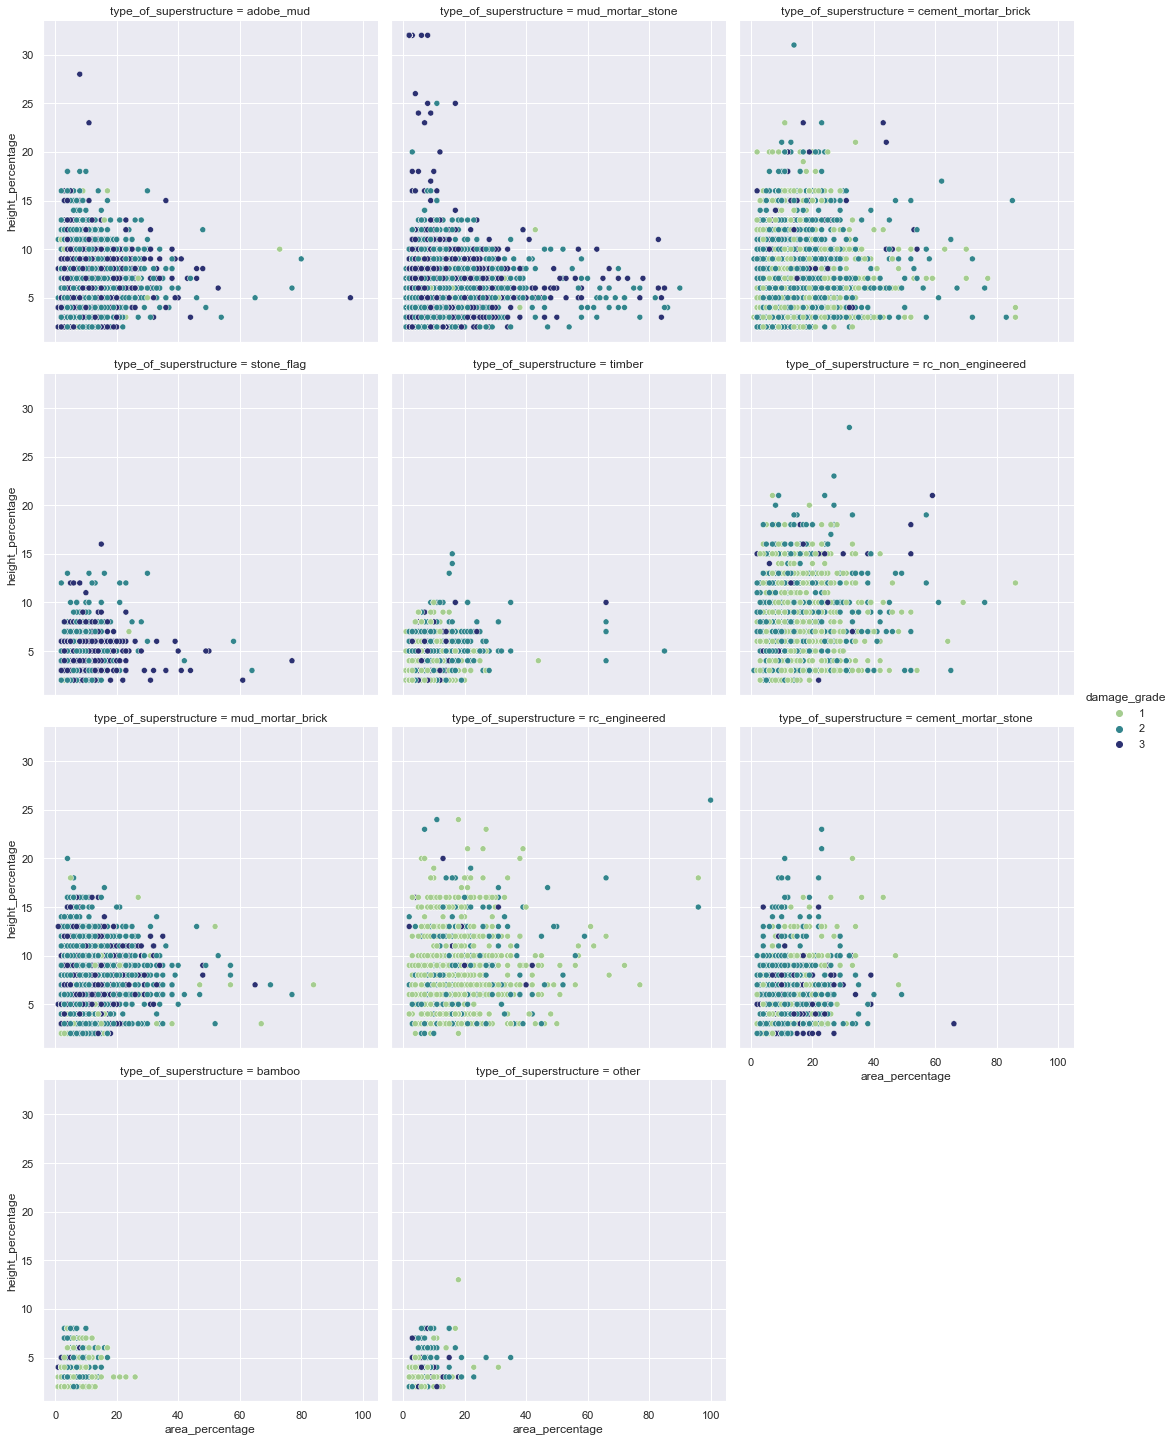

In [113]:
sns.relplot(data=df_train, x="area_percentage", y="height_percentage", hue="damage_grade", col="type_of_superstructure"
            , col_wrap=3, palette='crest')

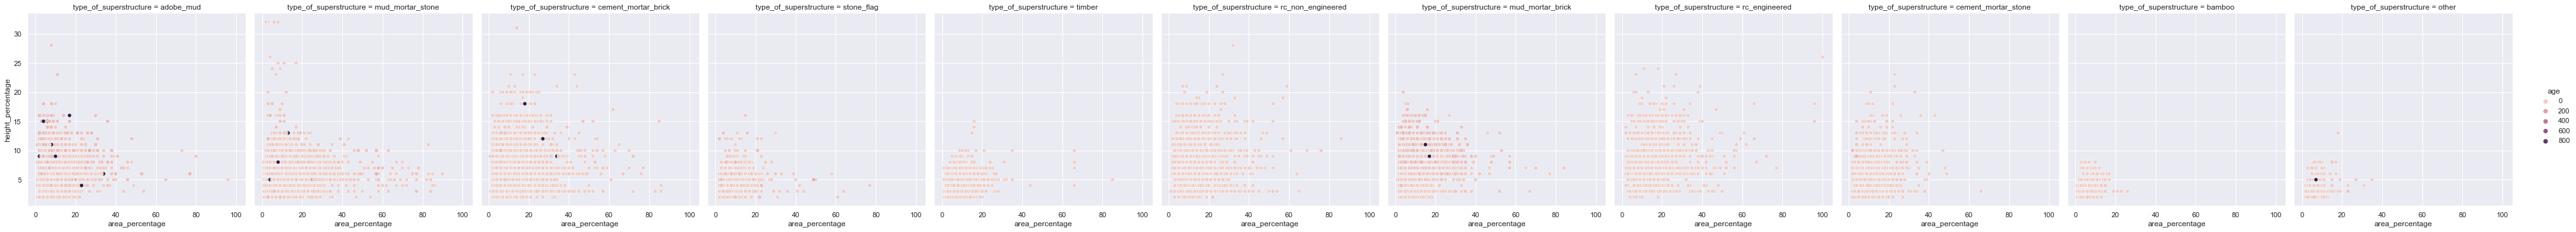

In [114]:
sns.relplot(data=df_train, x="area_percentage", y="height_percentage", hue="age", col="type_of_superstructure")


In [115]:
data = df[['operating_system','brand','person']].groupby('person').first()
data = data.dropna()

data['operating_system'].replace({'mac':'iOS/mac', 'ios':'iOS/mac', 'ubuntu':'linux'},inplace=True)
oss = ['android','windows','iOS/mac','linux']
brands = ['samsung','motorola','iphone']

data = data[(data['brand'].isin(brands)) & (data['operating_system'].isin(oss))]
data.head()

NameError: name 'df' is not defined